In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/Users/carterwebb/Desktop/kelps/data/cleaned_data/"

bed_vars = [
    'Aiston_Preserve','Biz_Point','Cherry_Point_Gulf_Rd','Clallam_Bay','Coffin_Rocks',
    'Ebeys_Landing','Freshwater_Bay_1','Freshwater_Bay_2','Hat_Island','Hoypus_Point',
    'Lowell','Lummi_SW','North_Beach_East','Polnell_Point','Possession_Point',
    'Shannon_Point_East','Shannon_Point_West'
]

for var in bed_vars:
    globals()[var] = pd.read_csv(path + var + ".csv")

In [183]:
Ebeys_Landing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             27 non-null     object 
 1   Site Code            27 non-null     object 
 2   Survey Date          27 non-null     object 
 3   Survey Day           27 non-null     float64
 4   NWSC Max Ext         27 non-null     float64
 5   Survey Month         27 non-null     float64
 6   Survey Year          27 non-null     float64
 7   Acres                27 non-null     float64
 8   Temp                 18 non-null     float64
 9   Temp1 Shore Edge     9 non-null      float64
 10  Temp1 Water Edge     11 non-null     float64
 11  Temp2 Shore Edge     3 non-null      float64
 12  Temp2 Water Edge     4 non-null      float64
 13  Ave Temp Shore Edge  9 non-null      float64
 14  Ave Temp Water Edge  9 non-null      float64
dtypes: float64(12), object(3)
memory usage: 3.

In [187]:
def fill_temperature(df):
    """
    Fills a new temperature column 'Temp_Final' using the following logic:
    
    1. If Temp exists → use Temp
    2. Else:
        a. If both Ave Temp Shore Edge and Ave Temp Water Edge exist:
              (Ave Temp Shore Edge + Ave Temp Water Edge) / 2
        b. Else:
              ((Temp1 Shore Edge + Temp2 Shore Edge)/2  +  
               (Temp1 Water Edge + Temp2 Water Edge)/2) / 2
    """

    df["Temp_Final"] = np.where(
        ~df["Temp"].isna(),                      # Case 1: Temp exists
        df["Temp"],                              # → use Temp

        np.where(
            (~df["Ave Temp Shore Edge"].isna()) &
            (~df["Ave Temp Water Edge"].isna()), # Case 2a: both average temps exist
            (df["Ave Temp Shore Edge"] + df["Ave Temp Water Edge"]) / 2,

            # Case 2b: fallback using Temp1/Temp2 averages
            (
                ((df["Temp1 Shore Edge"] + df["Temp2 Shore Edge"]) / 2) +
                ((df["Temp1 Water Edge"] + df["Temp2 Water Edge"]) / 2)
            ) / 2
        )
    )

    return df

In [164]:
fill_temperature(Ebeys_Landing)

Bed Name Site Code Survey Date  Survey Day  NWSC Max Ext  \
0   Ebey's Landing       EBL  2015-06-14        14.0           0.0   
1   Ebey's Landing       EBL  2015-07-19        19.0           0.0   
2   Ebey's Landing       EBL  2015-08-15        15.0           1.0   
3   Ebey's Landing       EBL  2015-09-26        26.0           0.0   
4   Ebey's Landing       EBL  2016-06-25        25.0           0.0   
5   Ebey's Landing       EBL  2016-07-22        22.0           1.0   
6   Ebey's Landing       EBL  2016-08-19        19.0           0.0   
7   Ebey's Landing       EBL  2017-06-26        26.0           0.0   
8   Ebey's Landing       EBL  2017-07-25        25.0           0.0   
9   Ebey's Landing       EBL  2017-08-23        23.0           0.0   
10  Ebey's Landing       EBL  2017-09-16        16.0           1.0   
11  Ebey's Landing       EBL  2018-05-28        28.0           0.0   
12  Ebey's Landing       EBL  2018-07-02         2.0           0.0   
13  Ebey's Landing       EBL  2018-08-07         7.0           1.0   
14  Ebey's Landing       EBL  2019-06-21        21.0           0.0   
15  Ebey's Landing       EBL  2019-07-18        18.0           0.0   
16  Ebey's Landing       EBL  2019-08-13        13.0           1.0   
17  Ebey's Landing       EBL  2019-09-27        27.0           0.0   
18  Ebey's Landing       EBL  2020-06-18        18.0           0.0   
19  Ebey's Landing       EBL  2020-06-18        18.0           0.0   
20  Ebey's Landing       EBL  2020-07-18        18.0           0.0   
21  Ebey's Landing       EBL  2020-08-30        30.0           1.0   
22  Ebey's Landing       EBL  2020-08-30        30.0           1.0   
23  Ebey's Landing       EBL  2021-08-11        11.0           1.0   
24  Ebey's Landing       EBL  2022-08-23        23.0           1.0   
25  Ebey's Landing       EBL  2023-08-14        14.0           1.0   
26  Ebey's Landing       EBL  2024-08-20        20.0           1.0   

    Survey Month  Survey Year      Acres  Temp  Temp1 Shore Edge  \
0            6.0       2015.0   9.490754  11.0               NaN   
1            7.0       2015.0  14.626063  13.0               NaN   
2            8.0       2015.0  18.354044  13.0               NaN   
3            9.0       2015.0  17.885642  12.0               NaN   
4            6.0       2016.0  18.282310  14.0               NaN   
5            7.0       2016.0  20.396699  12.0               NaN   
6            8.0       2016.0  18.985232  13.0               NaN   
7            6.0       2017.0  14.044818  11.0               NaN   
8            7.0       2017.0  20.161350  12.0               NaN   
9            8.0       2017.0  20.945903  13.0               NaN   
10           9.0       2017.0  21.534815  11.0               NaN   
11           5.0       2018.0   0.301316  10.0               NaN   
12           7.0       2018.0  18.513422  12.0               NaN   
13           8.0       2018.0  21.293413  12.0               NaN   
14           6.0       2019.0  24.952333  12.0               NaN   
15           7.0       2019.0  37.181197  12.3               NaN   
16           8.0       2019.0  41.131154  13.0               NaN   
17           9.0       2019.0  32.447042  11.0               NaN   
18           6.0       2020.0  17.910271   NaN              11.8   
19           6.0       2020.0  16.765066   NaN              11.8   
20           7.0       2020.0  32.668399   NaN              11.5   
21           8.0       2020.0  39.986982   NaN              11.9   
22           8.0       2020.0  41.614620   NaN              11.9   
23           8.0       2021.0  37.681341   NaN              12.0   
24           8.0       2022.0  38.629817   NaN              11.9   
25           8.0       2023.0  31.122627   NaN              11.8   
26           8.0       2024.0  33.207906   NaN              11.0   

    Temp1 Water Edge  Temp2 Shore Edge  Temp2 Water Edge  Ave Temp Shore Edge  \
0                NaN               NaN               NaN       

In [246]:
def max_corr(df):

    df["Survey Date"] = pd.to_datetime(df["Survey Date"])
    
    # 1. Select Max Extent only
    df_max = (
        df[df["NWSC Max Ext"] == 1]
        .sort_values(["Site Code", "Survey Year", "Acres"],
                     ascending=[True, True, False])
        .drop_duplicates(subset=["Site Code", "Survey Year"], keep="first")
        .copy()
    )

    df_max["PctAcreChange"] = (
        df_max.groupby("Site Code")["Acres"]
              .pct_change()
              * 100
    )
    
    # 2. Build lagged temp predictors (shift-based)
    df_max["Temp_t"]        = df_max["Temp_Final"]
    df_max["Temp_t_minus1"] = df_max.groupby("Site Code")["Temp_Final"].shift(1)
    df_max["Temp_t_minus2"] = df_max.groupby("Site Code")["Temp_Final"].shift(2)
    df_max["Temp_t_minus3"] = df_max.groupby("Site Code")["Temp_Final"].shift(3)
    df_max["Temp_t_minus4"] = df_max.groupby("Site Code")["Temp_Final"].shift(4)


    def get_temp_for_date_and_site(target_date, site_code_to_match, df_filtered_for_temp):
        # Filter for the exact site code, year, month
        match = df_filtered_for_temp[
            (df_filtered_for_temp['Site Code'] == site_code_to_match) &
            (df_filtered_for_temp['Survey Date'].dt.year == target_date.year)
        ]
        if not match.empty:
            # We are looking for the 'Temp_Final' column which was created earlier
            return match['Temp_Final'].iloc[0]
        return pd.NA
        
    # ------- NEW: DateOffset-based lags ------- #
    def _get_offset_temps(row):
        # make sure this matches your actual date column name
        current_date = row["Survey Date"]
        current_site = row["Site Code"]

        one_year_ago    = current_date - pd.DateOffset(years=1)
        two_years_ago   = current_date - pd.DateOffset(years=2)
        three_years_ago = current_date - pd.DateOffset(years=3)
        four_years_ago  = current_date - pd.DateOffset(years=4)

        # all four MUST be defined in this scope
        temp_1 = get_temp_for_date_and_site(one_year_ago,    current_site, df)
        temp_2 = get_temp_for_date_and_site(two_years_ago,   current_site, df)
        temp_3 = get_temp_for_date_and_site(three_years_ago, current_site, df)
        temp_4 = get_temp_for_date_and_site(four_years_ago,  current_site, df)

        return pd.Series(
            {
                "Temp_offset_minus1": temp_1,
                "Temp_offset_minus2": temp_2,
                "Temp_offset_minus3": temp_3,
                "Temp_offset_minus4": temp_4,
            }
        )

    df_max[
        ["Temp_offset_minus1",
         "Temp_offset_minus2",
         "Temp_offset_minus3",
         "Temp_offset_minus4"]
    ] = df_max.apply(_get_offset_temps, axis=1)
    # ------- END NEW BLOCK ------- #

    # 2.1 Temp Imputation (currently only for the shift-based temps)
    temp_cols = ["Temp_t", "Temp_t_minus1", "Temp_t_minus2",
                 "Temp_t_minus3", "Temp_t_minus4"]

    monthly_avgs = (
        df_max.groupby(["Site Code", "Survey Month"])["Temp_Final"]
              .mean()
              .rename("MonthlyTempMean")
    )

    df_max = df_max.merge(monthly_avgs, on=["Site Code", "Survey Month"], how="left")

    for col in temp_cols:
        df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])

    # 3. Predictor list (still just the shift-based temps for now)
    predictor_variables = [
        "Temp_t", "Temp_t_minus1", "Temp_t_minus2", "Temp_t_minus3", "Temp_t_minus4"
    ]

    # 4. Numerical predictors
    numerical_predictors = (
        df_max[predictor_variables]
        .select_dtypes(include="number")
        .columns
        .to_list()
    )

    # 5. Correlation matrix with Acres appended
    corr_matrix = df_max[numerical_predictors + ["Acres", "PctAcreChange"]].corr()

    # Subset of columns to show
    selected_cols = [
        "Site Code", "Survey Date", "Survey Day", "Survey Month", "Survey Year",
        "Acres",
        "Temp_t", "Temp_t_minus1", "Temp_t_minus2",
        "Temp_t_minus3", "Temp_t_minus4",
        "Temp_offset_minus1", "Temp_offset_minus2",
        "Temp_offset_minus3", "Temp_offset_minus4",
        "PctAcreChange",
    ]

    df_selected = df_max[selected_cols]
    
    # 6. Heatmap + Pairplot
    g = sns.pairplot(
        data=df_selected,
        vars=numerical_predictors + ["Acres", "PctAcreChange"],
        kind="reg",
        plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}},
    )

    cmap = plt.get_cmap("cividis")


    norm = plt.Normalize(vmin=-1, vmax=1)

    for i, row_var in enumerate(corr_matrix.columns):
        for j, col_var in enumerate(corr_matrix.columns):
            ax = g.axes[i, j]
            if ax is not None:
                r = corr_matrix.loc[row_var, col_var]
                color = cmap(norm(r))
                ax.set_facecolor(color)

    for ax in g.axes.flat:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14, rotation=30, ha='right')
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    plt.suptitle("Pairplot & Correlation Heatmap", y=1.02, fontsize=20, fontweight='bold')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    g.fig.colorbar(sm, ax=g.axes, shrink=0.6, label="Correlation")

    plt.show()

    site = df_max["Site Code"].iloc[0]

    df_selected.to_csv(
        f"/Users/carterwebb/Desktop/kelps/data/cleaned_data/corr_dfs/{site}_corrDF.csv",
        index=False
    )

    return df_selected

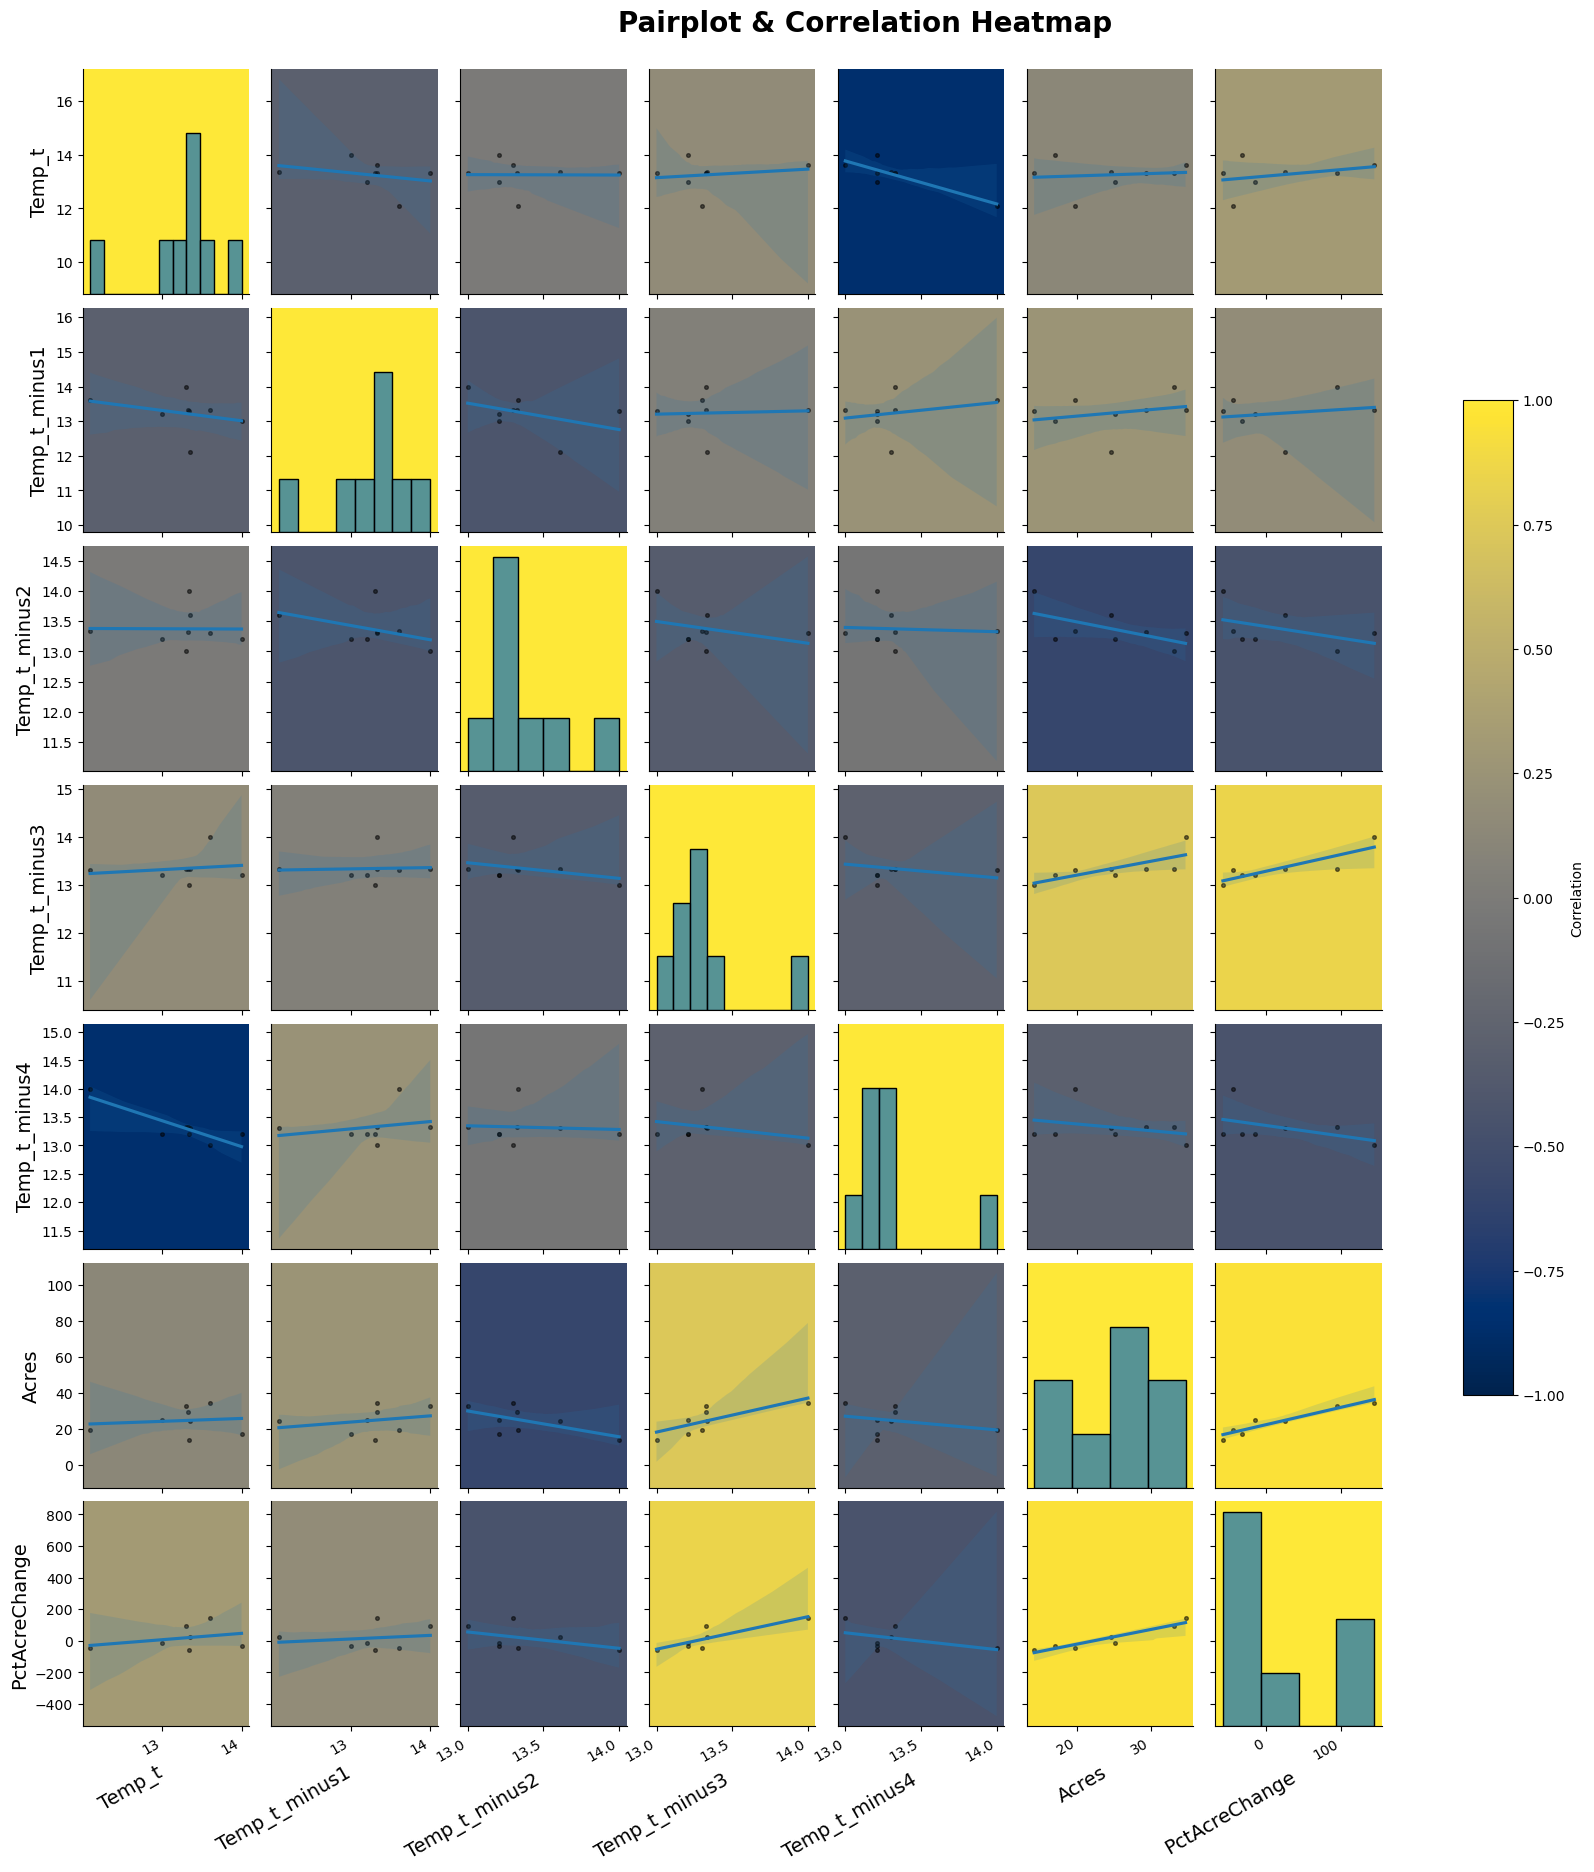

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0      CHPT  2017-09-04         4.0           9.0       2017.0  29.379643   
1      CHPT  2018-08-08         8.0           8.0       2018.0  25.138300   
2      CHPT  2019-08-13        13.0           8.0       2019.0  17.085823   
3      CHPT  2020-09-01         1.0           9.0       2020.0  33.130759   
4      CHPT  2021-08-10        10.0           8.0       2021.0  14.214370   
5      CHPT  2022-08-11        11.0           8.0       2022.0  34.699685   
6      CHPT  2023-08-03         3.0           8.0       2023.0  19.683247   
7      CHPT  2024-09-01         1.0           9.0       2024.0  24.558852   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  13.325         13.325         13.325         13.325         13.325   
1  13.000         13.209         13.209         13.209         13.209   
2  14.000         13.000         13.209         13.209         13.209   
3  13.300         14.000         13.000         13.325         13.325   
4  13.335         13.300         14.000         13.000         13.209   
5  13.610         13.335         13.300         14.000         13.000   
6  12.100         13.610         13.335         13.300         14.000   
7  13.350         12.100         13.610         13.335         13.300   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               14.0               <NA>               <NA>               <NA>   
2               13.0               14.0               <NA>               <NA>   
3               14.0               13.0               14.0               <NA>   
4               13.3               14.0               13.0               14.0   
5             13.335               13.3               14.0               13.0   
6              13.61             13.335               13.3               14.0   
7               12.1              13.61             13.335               13.3   

   PctAcreChange  
0            NaN  
1     -14.436335  
2     -32.032702  
3      93.907890  
4     -57.096153  
5     144.116938  
6     -43.275432  
7      24.770328

In [251]:
fill_temperature(Cherry_Point_Gulf_Rd)
max_corr(Cherry_Point_Gulf_Rd)

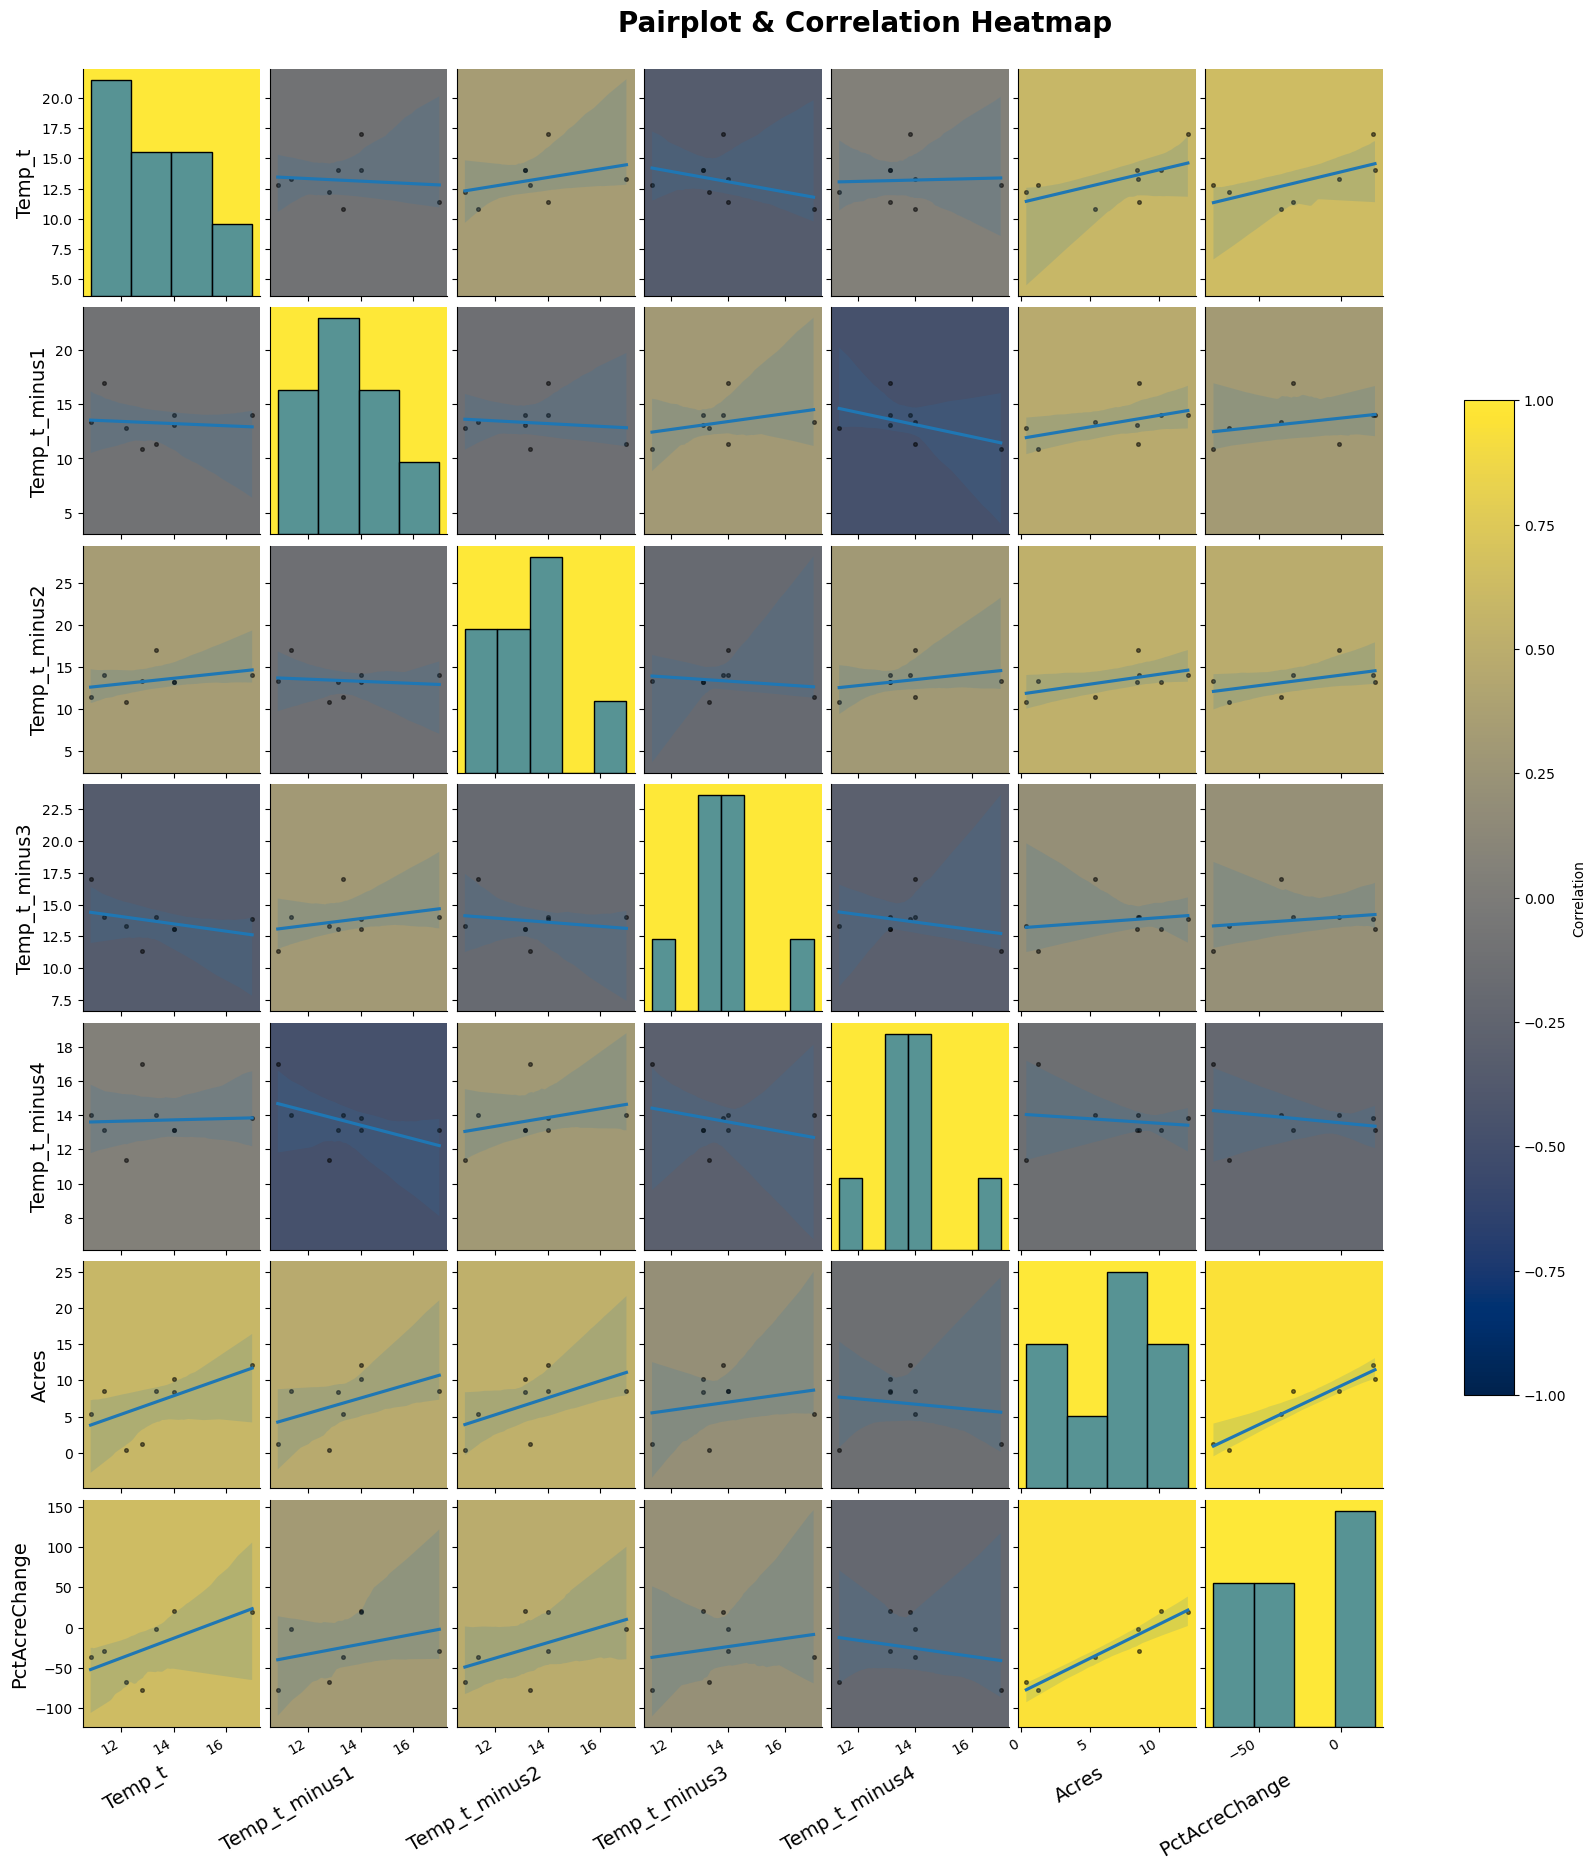

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0    SHPT-E  2017-09-15        15.0           9.0       2017.0   8.398104   
1    SHPT-E  2018-09-10        10.0           9.0       2018.0  10.128359   
2    SHPT-E  2019-08-18        18.0           8.0       2019.0  12.096496   
3    SHPT-E  2020-09-18        18.0           9.0       2020.0   8.583313   
4    SHPT-E  2021-08-20        20.0           8.0       2021.0   8.483059   
5    SHPT-E  2022-07-01         1.0           7.0       2022.0   5.374904   
6    SHPT-E  2023-08-04         4.0           8.0       2023.0   1.216887   
7    SHPT-E  2024-08-16        16.0           8.0       2024.0   0.390402   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  14.000      13.116667      13.116667      13.116667      13.116667   
1  14.000      14.000000      13.116667      13.116667      13.116667   
2  17.000      14.000000      14.000000      13.832500      13.832500   
3  11.350      17.000000      14.000000      14.000000      13.116667   
4  13.330      11.350000      17.000000      14.000000      14.000000   
5  10.835      13.330000      11.350000      17.000000      14.000000   
6  12.800      10.835000      13.330000      11.350000      17.000000   
7  12.200      12.800000      10.835000      13.330000      11.350000   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               14.0               <NA>               <NA>               <NA>   
2                NaN               14.0               <NA>               <NA>   
3               15.0                NaN               14.0               <NA>   
4              15.75               15.0                NaN               14.0   
5             14.445              15.75               15.0                NaN   
6               9.44             14.445              15.75               15.0   
7               11.1               9.44             14.445              15.75   

   PctAcreChange  
0            NaN  
1      20.602937  
2      19.431941  
3     -29.042983  
4      -1.168013  
5     -36.639547  
6     -77.359844  
7     -67.918008

In [248]:
fill_temperature(Shannon_Point_East)
max_corr(Shannon_Point_East)

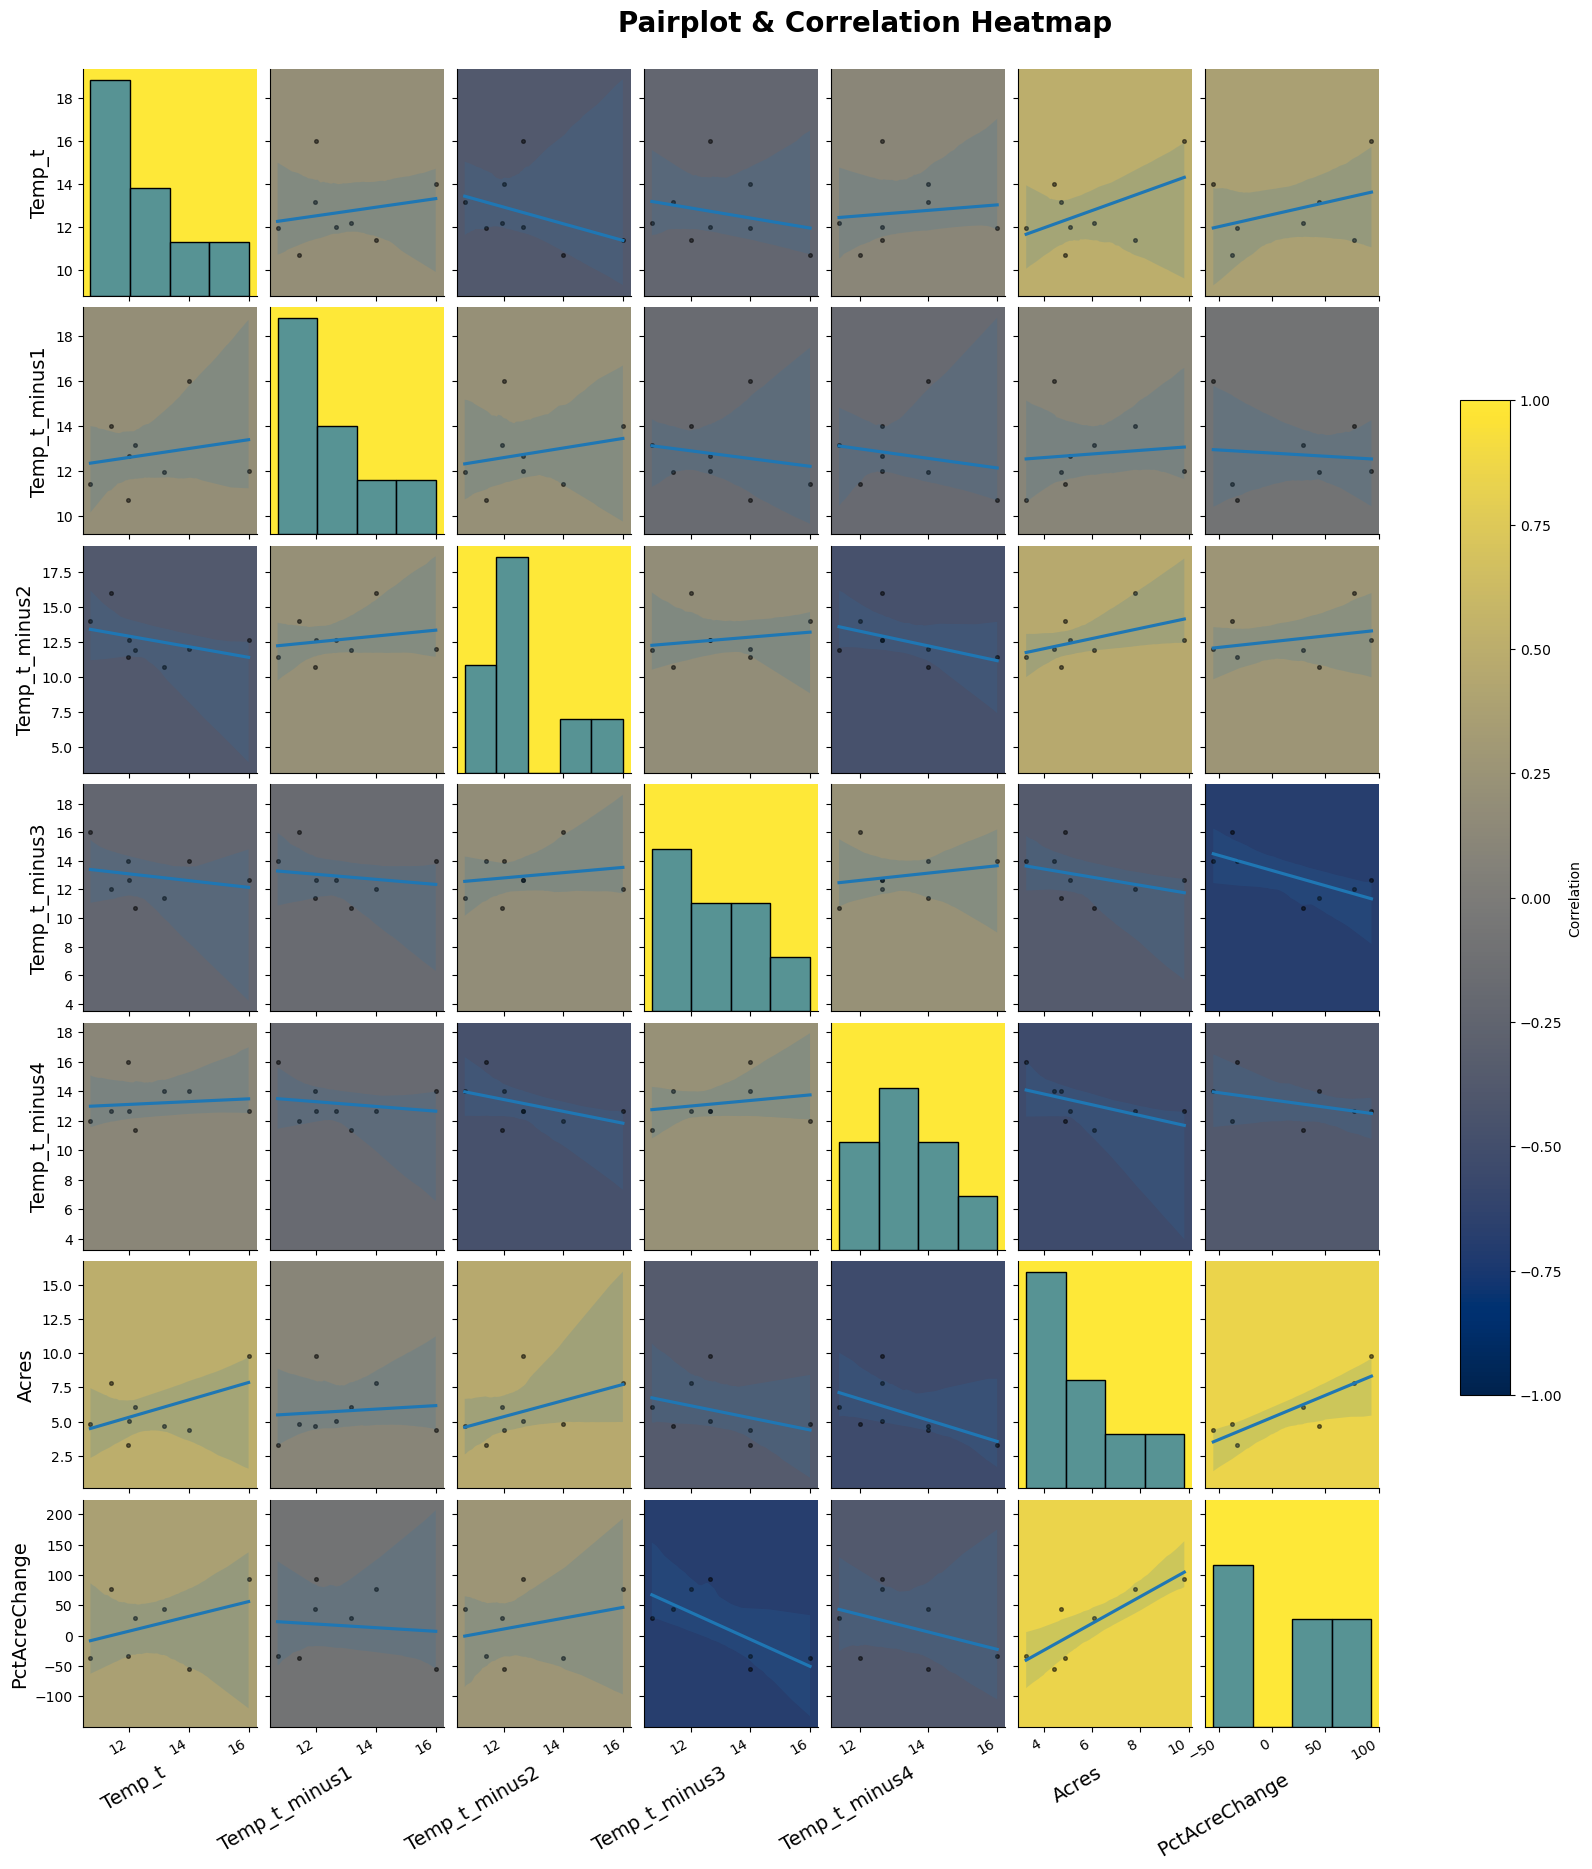

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0    SHPT-W  2017-09-15        15.0           9.0       2017.0  5.081829   
1    SHPT-W  2018-09-10        10.0           9.0       2018.0  9.818176   
2    SHPT-W  2019-07-28        28.0           7.0       2019.0  4.414529   
3    SHPT-W  2020-09-18        18.0           9.0       2020.0  7.790410   
4    SHPT-W  2021-09-19        19.0           9.0       2021.0  4.860296   
5    SHPT-W  2022-08-12        12.0           8.0       2022.0  3.267264   
6    SHPT-W  2023-09-01         1.0           9.0       2023.0  4.720687   
7    SHPT-W  2024-08-16        16.0           8.0       2024.0  6.095017   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  12.000         12.649         12.649         12.649         12.649   
1  16.000         12.000         12.649         12.649         12.649   
2  14.000         16.000         12.000         14.000         14.000   
3  11.400         14.000         16.000         12.000         12.649   
4  10.695         11.400         14.000         16.000         12.000   
5  11.945         10.695         11.400         14.000         16.000   
6  13.150         11.945         10.695         11.400         14.000   
7  12.200         13.150         11.945         10.695         11.400   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               12.0               <NA>               <NA>               <NA>   
2                NaN               12.0               <NA>               <NA>   
3               14.0                NaN               12.0               <NA>   
4               14.4               14.0                NaN               12.0   
5             11.945               14.4               14.0                NaN   
6             11.665             11.945               14.4               14.0   
7              12.15             11.665             11.945               14.4   

   PctAcreChange  
0            NaN  
1      93.201636  
2     -55.037181  
3      76.472068  
4     -37.611814  
5     -32.776441  
6      44.484413  
7      29.112919

In [249]:
fill_temperature(Shannon_Point_West)
max_corr(Shannon_Point_West)

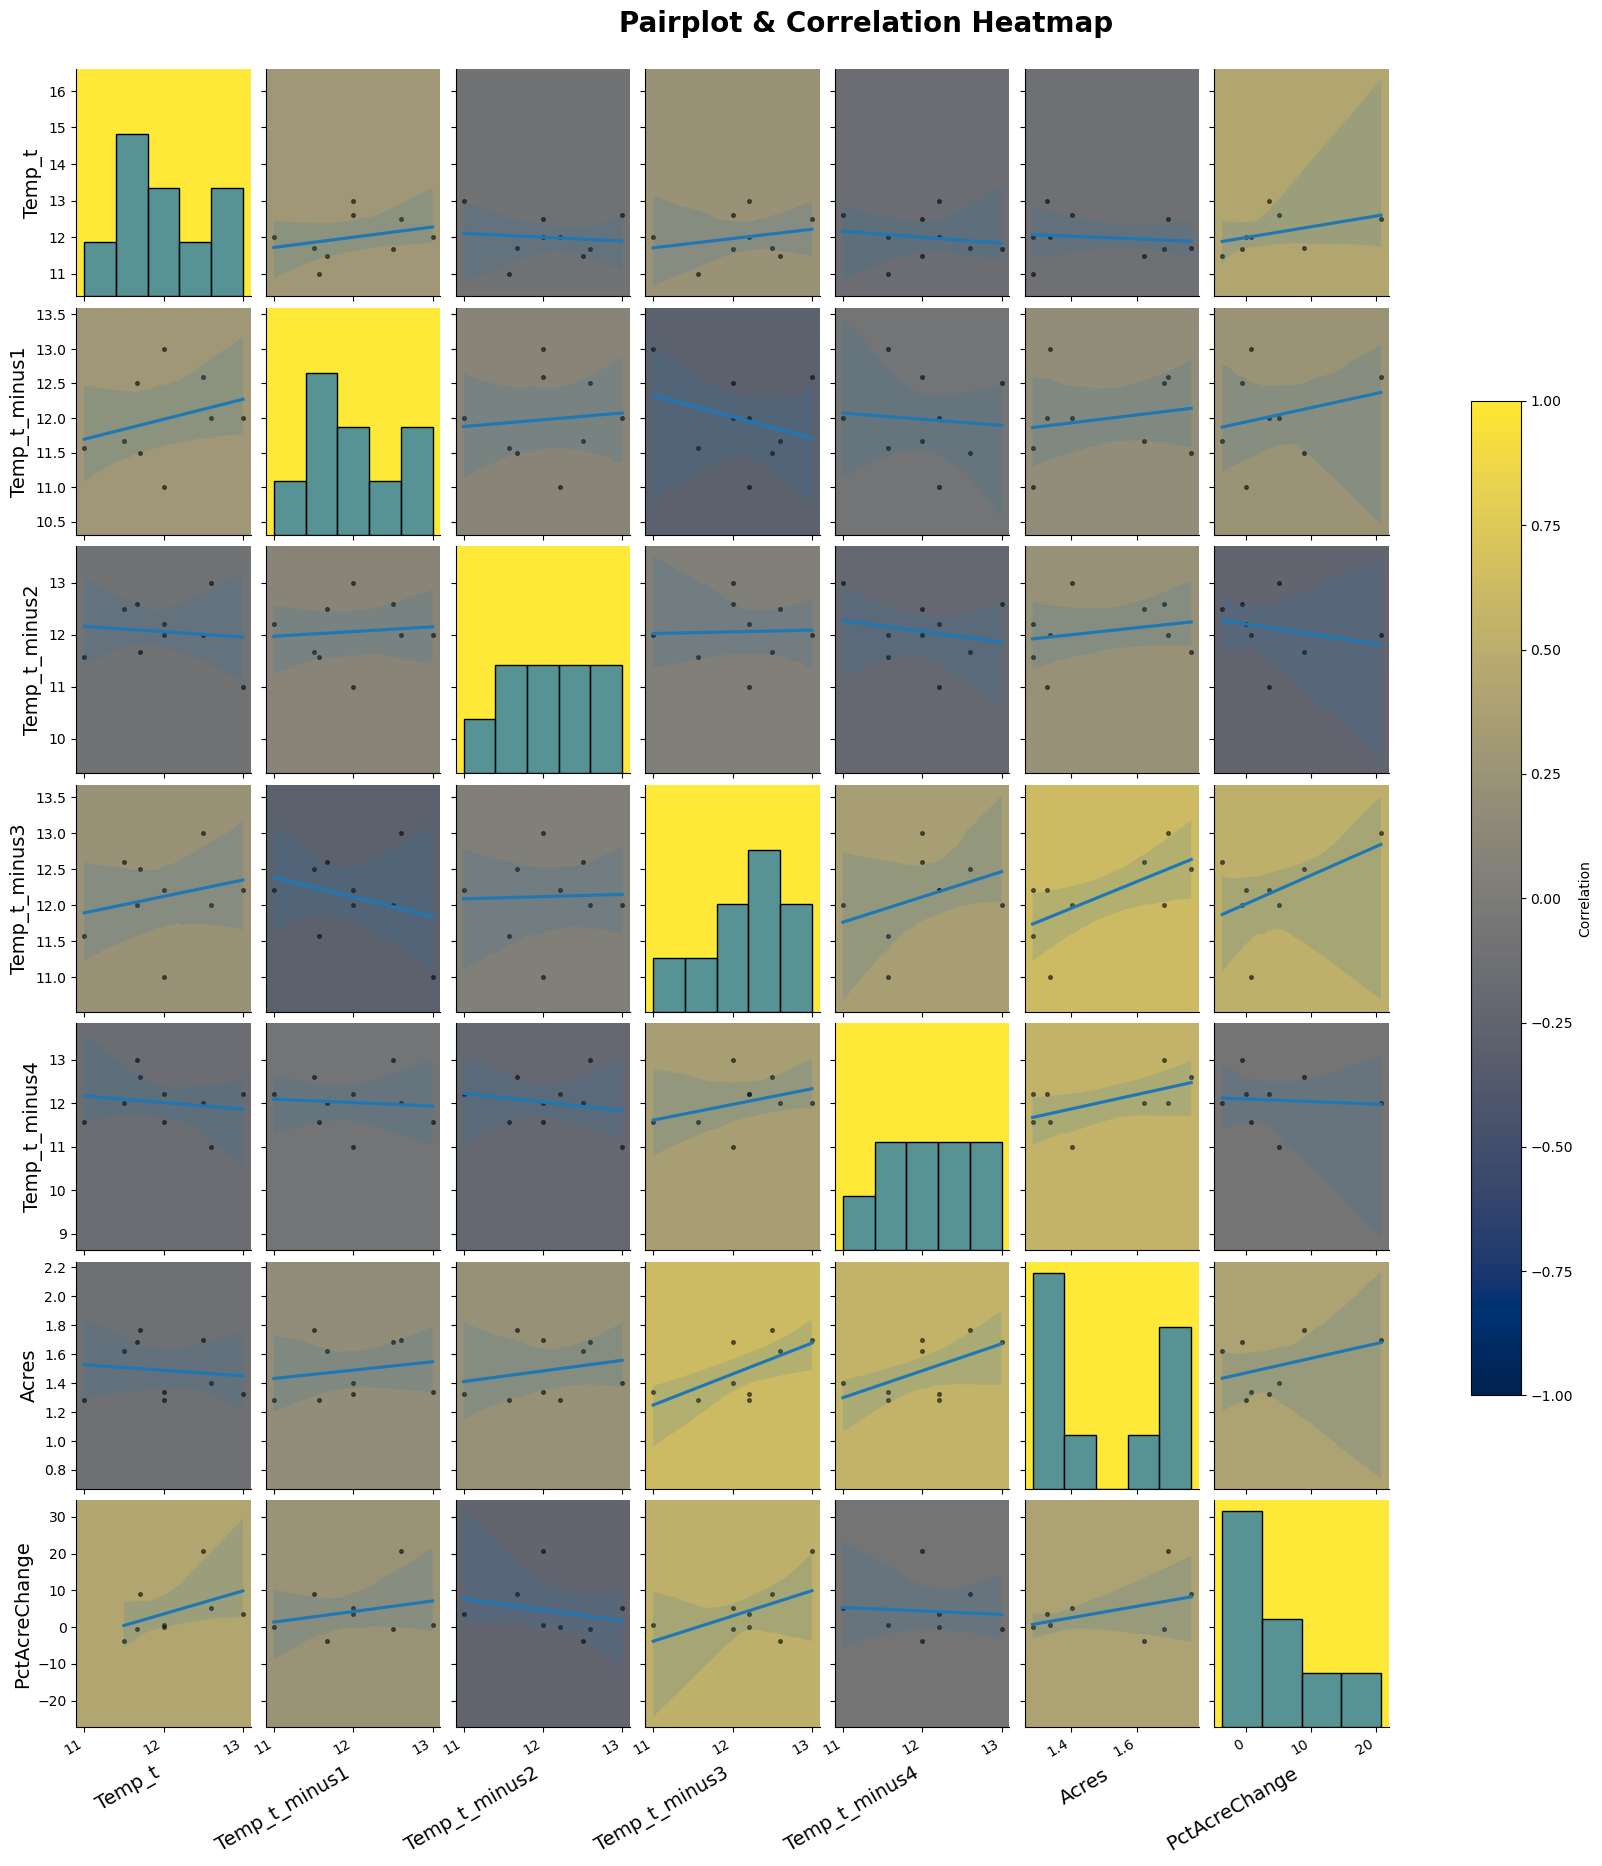

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0      COFF  2016-09-26        26.0           9.0       2016.0  1.282635   
1      COFF  2017-08-06         6.0           8.0       2017.0  1.281513   
2      COFF  2018-08-10        10.0           8.0       2018.0  1.326819   
3      COFF  2019-09-25        25.0           9.0       2019.0  1.335530   
4      COFF  2020-08-17        17.0           8.0       2020.0  1.403082   
5      COFF  2021-08-05         5.0           8.0       2021.0  1.695371   
6      COFF  2022-08-25        25.0           8.0       2022.0  1.684242   
7      COFF  2023-08-15        15.0           8.0       2023.0  1.621534   
8      COFF  2024-09-16        16.0           9.0       2024.0  1.766295   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0   11.00      11.566667      11.566667      11.566667      11.566667   
1   12.00      11.000000      12.211667      12.211667      12.211667   
2   13.00      12.000000      11.000000      12.211667      12.211667   
3   12.00      13.000000      12.000000      11.000000      11.566667   
4   12.60      12.000000      13.000000      12.000000      11.000000   
5   12.50      12.600000      12.000000      13.000000      12.000000   
6   11.67      12.500000      12.600000      12.000000      13.000000   
7   11.50      11.670000      12.500000      12.600000      12.000000   
8   11.70      11.500000      11.670000      12.500000      12.600000   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1                NaN               <NA>               <NA>               <NA>   
2               12.0                NaN               <NA>               <NA>   
3               12.0               12.0                NaN               <NA>   
4               12.0               12.0               12.0                NaN   
5              11.15               12.0               12.0               12.0   
6                9.5              11.15               12.0               12.0   
7             11.105                9.5              11.15               12.0   
8                NaN             11.105                9.5              11.15   

   PctAcreChange  
0            NaN  
1      -0.087470  
2       3.535398  
3       0.656469  
4       5.058126  
5      20.831874  
6      -0.656423  
7      -3.723212  
8       8.927443

In [252]:
fill_temperature(Coffin_Rocks)
max_corr(Coffin_Rocks)

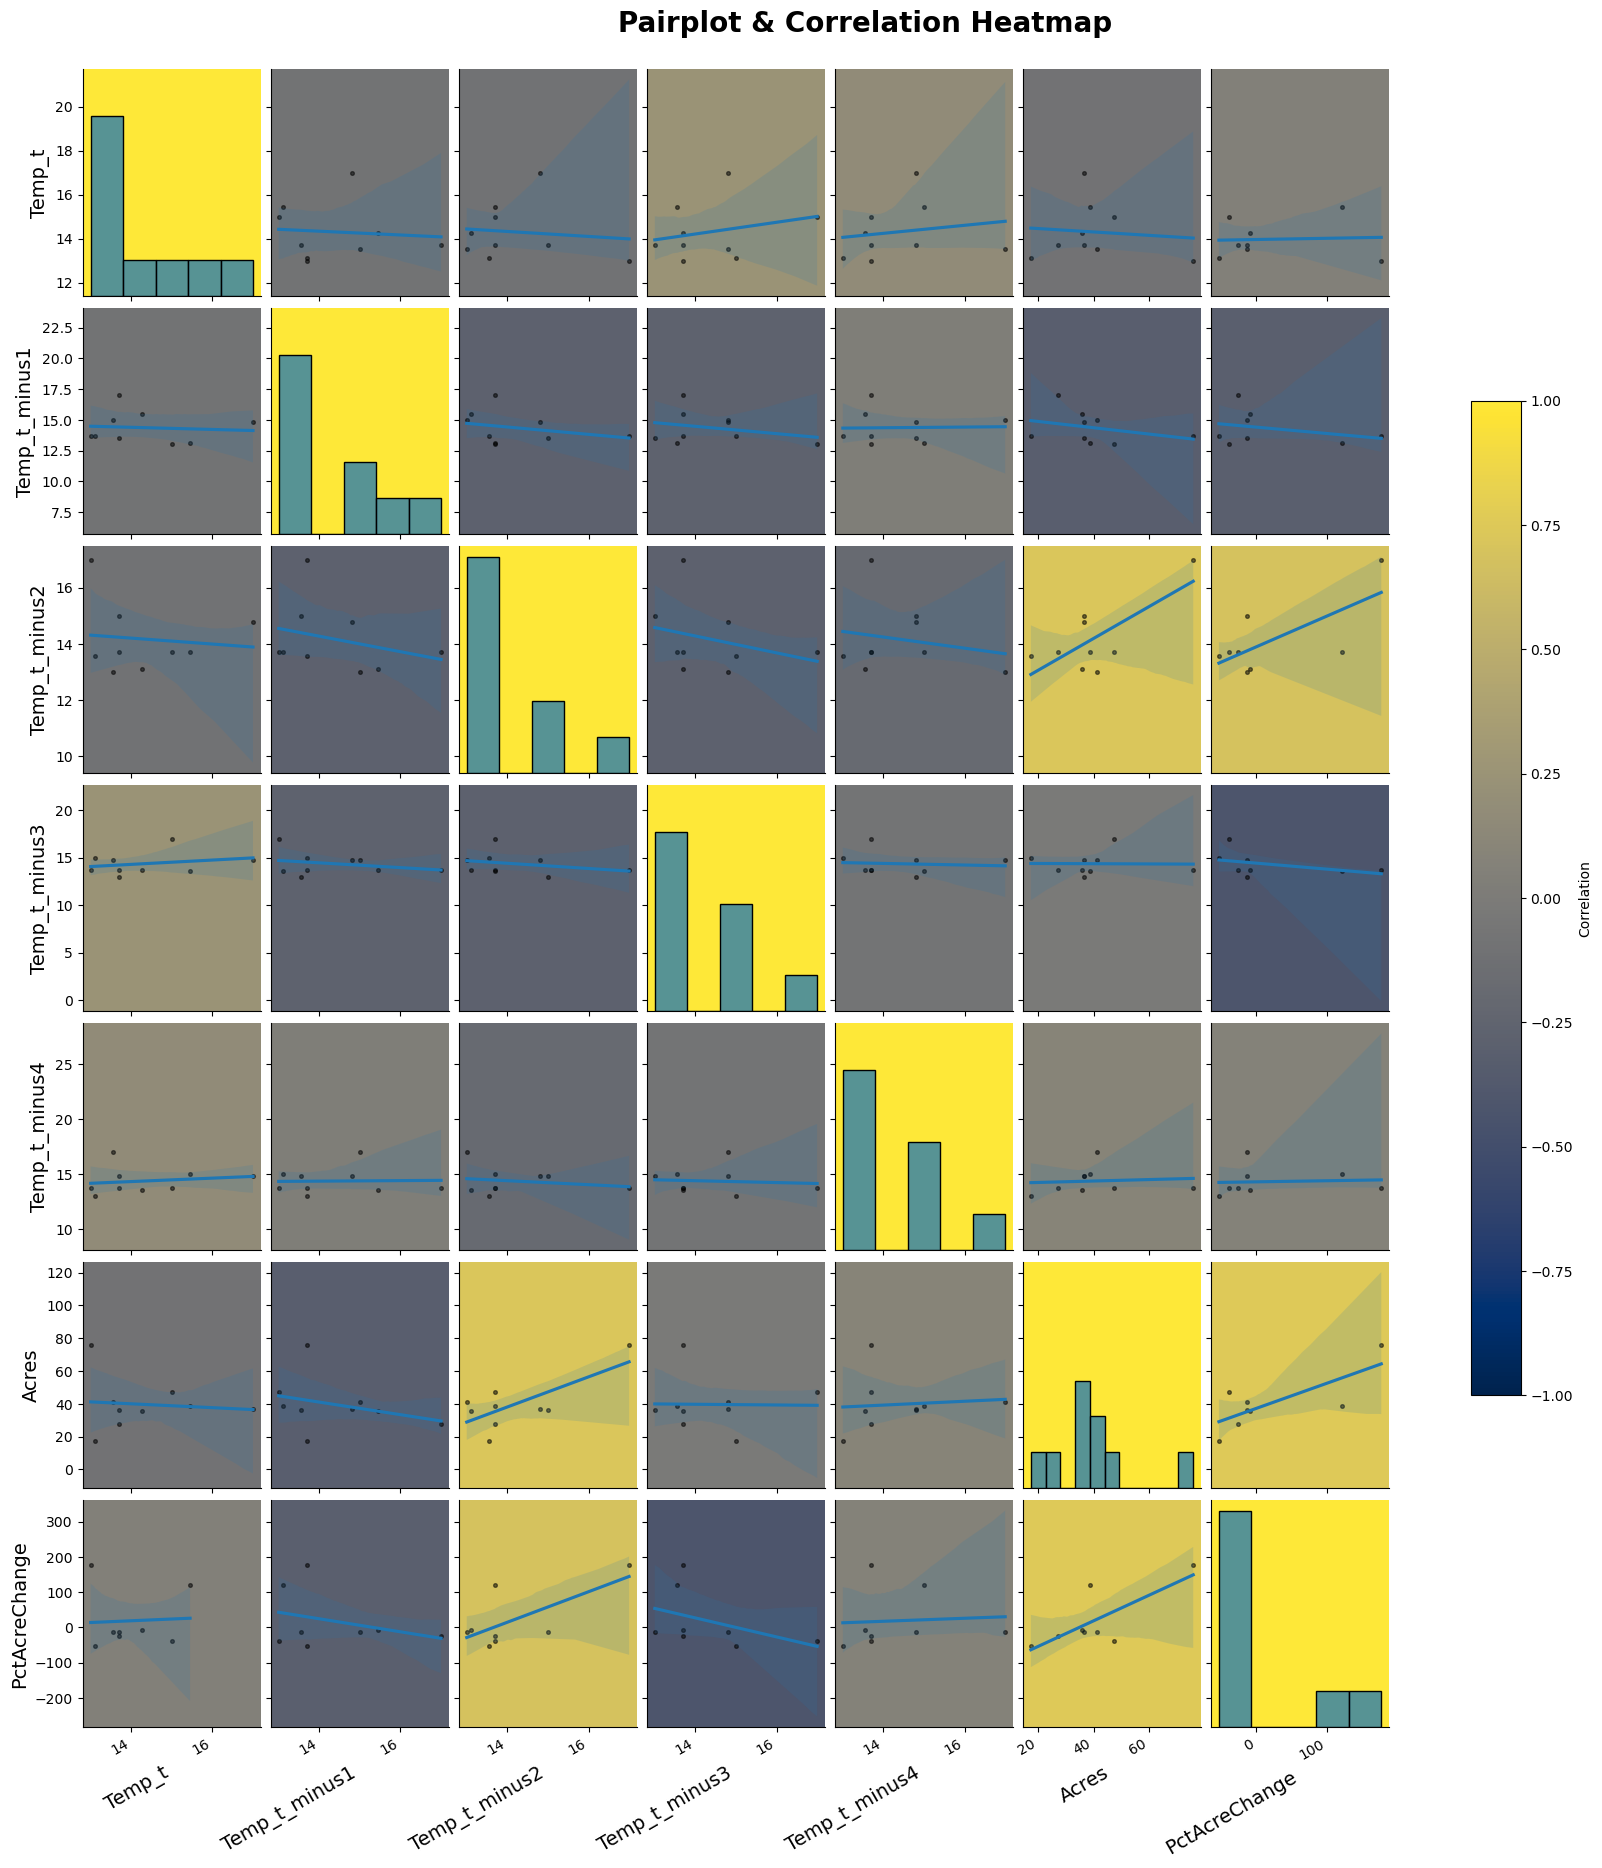

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0      POLN  2016-08-30        30.0           8.0       2016.0  36.728040   
1      POLN  2017-09-18        18.0           9.0       2017.0  27.432119   
2      POLN  2018-09-10        10.0           9.0       2018.0  75.709687   
3      POLN  2019-09-26        26.0           9.0       2019.0  47.312350   
4      POLN  2020-08-31        31.0           8.0       2020.0  41.303716   
5      POLN  2021-08-24        24.0           8.0       2021.0  36.426616   
6      POLN  2022-09-11        11.0           9.0       2022.0  17.561865   
7      POLN  2023-08-15        15.0           8.0       2023.0  38.712918   
8      POLN  2024-08-21        21.0           8.0       2024.0  35.730997   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  17.000         14.795         14.795         14.795         14.795   
1  13.700         17.000         13.700         13.700         13.700   
2  13.000         13.700         17.000         13.700         13.700   
3  15.000         13.000         13.700         17.000         13.700   
4  13.550         15.000         13.000         14.795         17.000   
5  13.700         13.550         15.000         13.000         14.795   
6  13.100         13.700         13.550         15.000         13.000   
7  15.450         13.100         13.700         13.550         15.000   
8  14.275         15.450         13.100         13.700         13.550   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               17.0               <NA>               <NA>               <NA>   
2               15.0               17.0               <NA>               <NA>   
3               18.0               15.0               17.0               <NA>   
4               15.0               18.0               15.0               17.0   
5               13.1               15.0               18.0               15.0   
6               13.7               13.1               15.0               18.0   
7             15.975               13.7               13.1               15.0   
8              15.45             15.975               13.7               13.1   

   PctAcreChange  
0            NaN  
1     -25.310147  
2     175.989204  
3     -37.508195  
4     -12.699927  
5     -11.807897  
6     -51.788371  
7     120.437399  
8      -7.702650

In [253]:
fill_temperature(Polnell_Point)
max_corr(Polnell_Point)

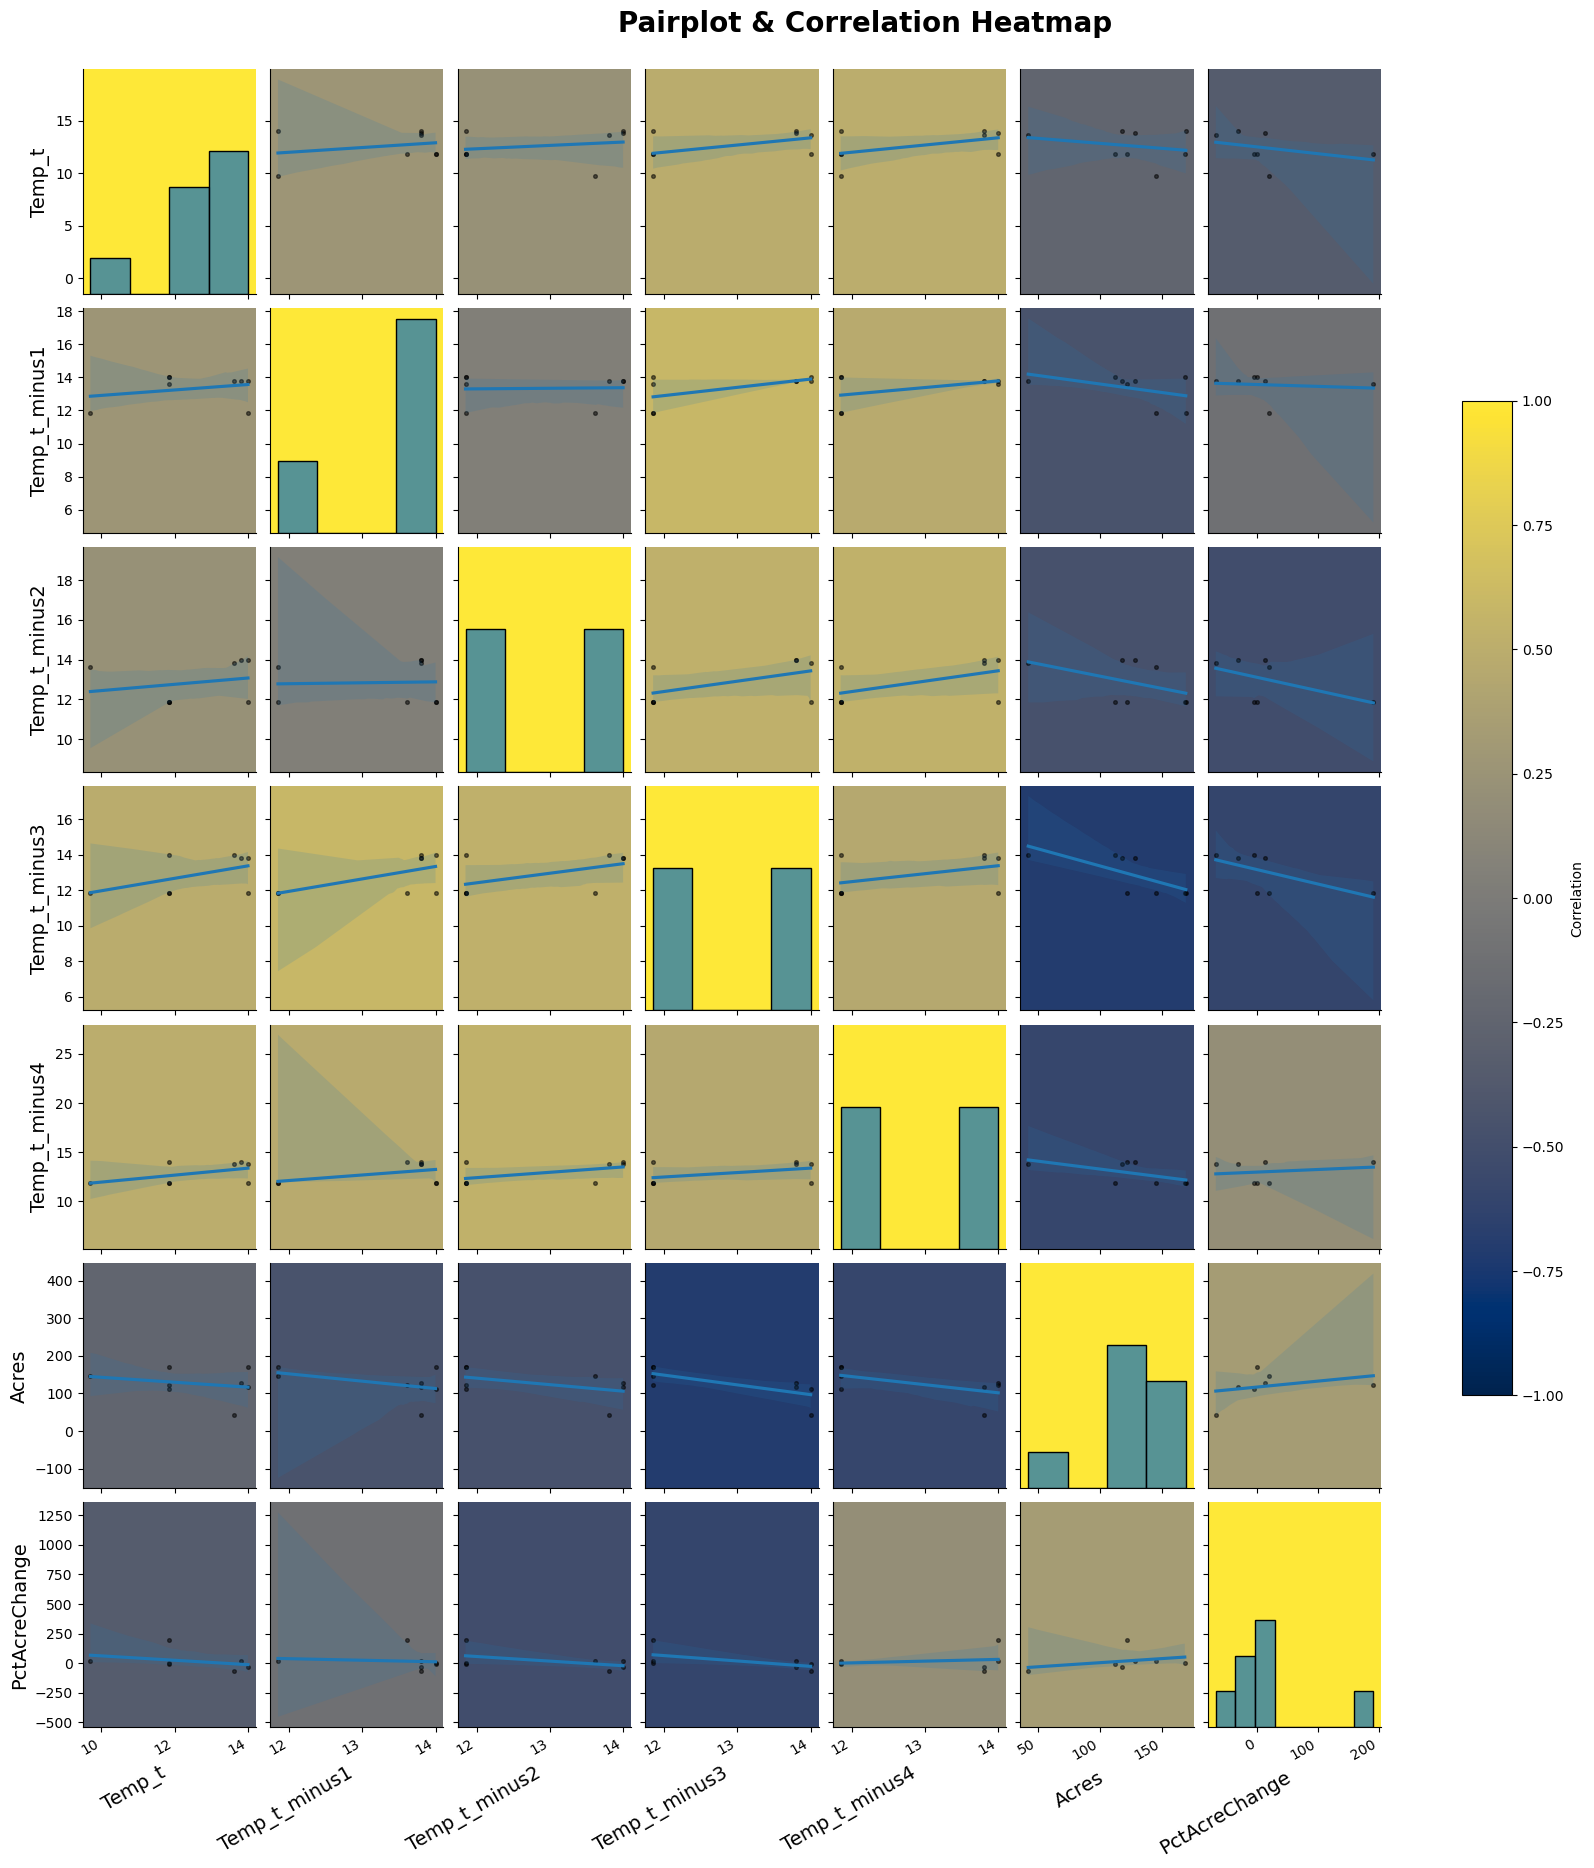

Site Code Survey Date  Survey Day  Survey Month  Survey Year       Acres  \
0       FWB  2016-08-19        19.0           8.0       2016.0  169.696118   
1       FWB  2017-08-20        20.0           8.0       2017.0  168.871267   
2       FWB  2019-07-20        20.0           7.0       2019.0  117.860533   
3       FWB  2020-08-19        19.0           8.0       2020.0  112.665764   
4       FWB  2021-07-27        27.0           7.0       2021.0  128.509924   
5       FWB  2022-07-31        31.0           7.0       2022.0   41.872913   
6       FWB  2023-08-14        14.0           8.0       2023.0  121.974427   
7       FWB  2024-08-22        22.0           8.0       2024.0  145.598466   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  14.000         11.850         11.850         11.850         11.850   
1  11.850         14.000         11.850         11.850         11.850   
2  14.000         13.805         14.000         13.805         13.805   
3  11.850         14.000         11.850         14.000         11.850   
4  13.805         13.805         14.000         13.805         14.000   
5  13.610         13.805         13.805         14.000         13.805   
6  11.850         13.610         11.850         11.850         14.000   
7   9.700         11.850         13.610         11.850         11.850   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               12.0               <NA>               <NA>               <NA>   
2               12.0                NaN               12.0               <NA>   
3               14.0               12.0                NaN               12.0   
4                NaN               14.0               12.0                NaN   
5                NaN                NaN               14.0               12.0   
6              13.61                NaN                NaN               14.0   
7              11.85              13.61                NaN                NaN   

   PctAcreChange  
0            NaN  
1      -0.486075  
2     -30.206876  
3      -4.407556  
4      14.062976  
5     -67.416592  
6     191.296733  
7      19.368026

In [254]:
fill_temperature(Freshwater_Bay_1)
max_corr(Freshwater_Bay_1)

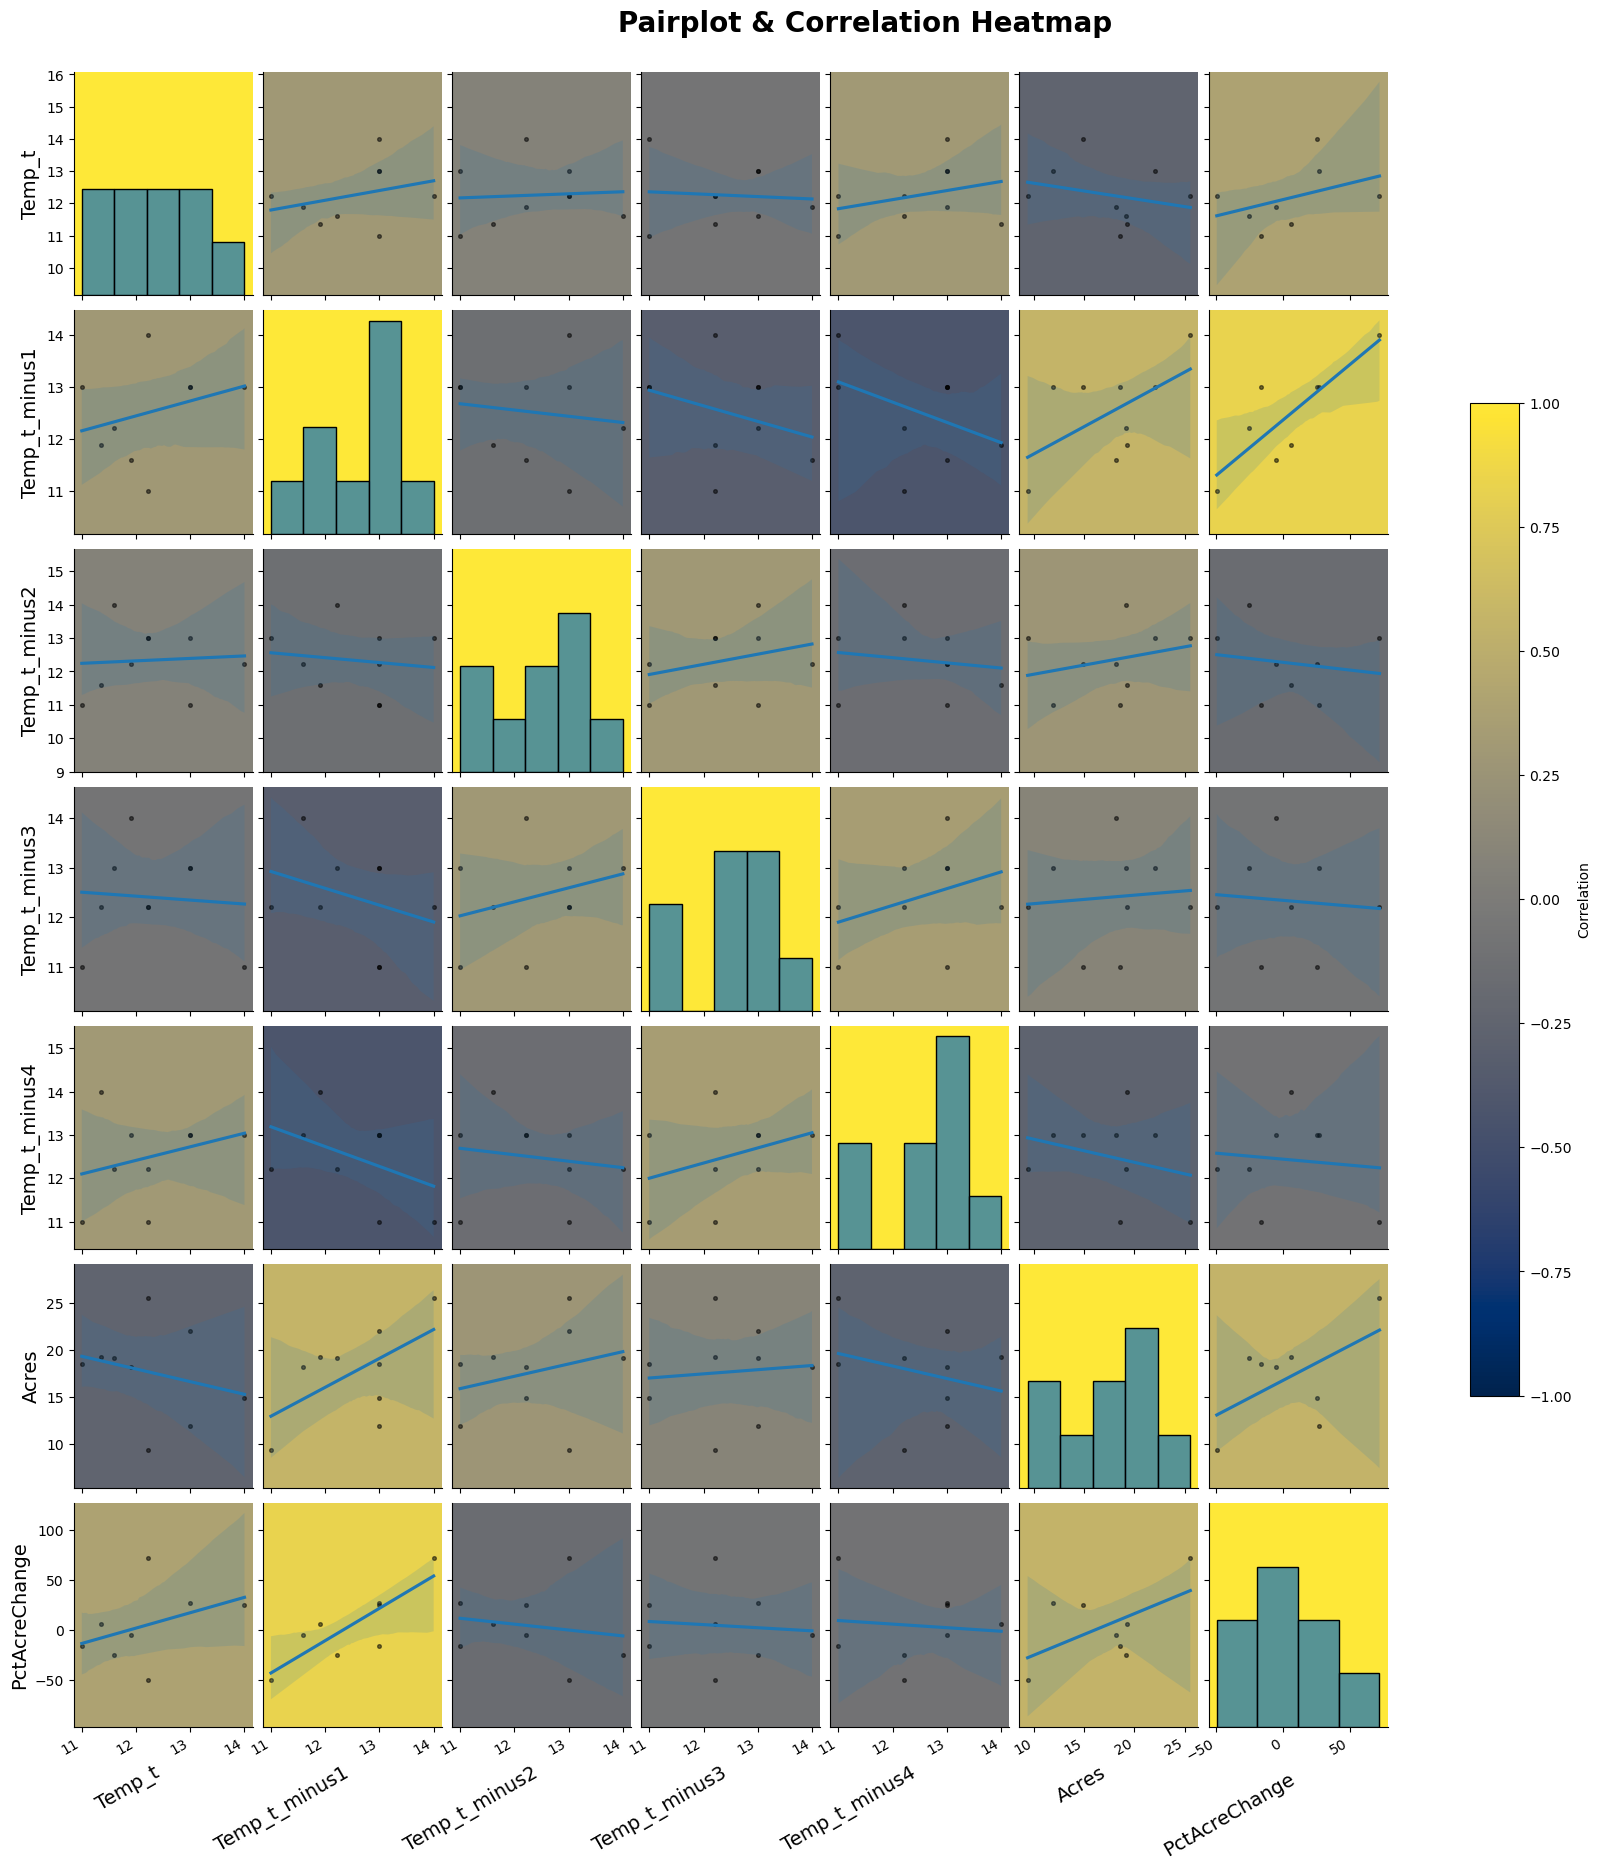

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0      NB-E  2016-09-22        22.0           9.0       2016.0  22.091116   
1      NB-E  2017-07-22        22.0           7.0       2017.0  18.515317   
2      NB-E  2018-08-25        25.0           8.0       2018.0   9.329159   
3      NB-E  2019-09-02         2.0           9.0       2019.0  11.850943   
4      NB-E  2020-08-26        26.0           8.0       2020.0  14.853054   
5      NB-E  2021-08-20        20.0           8.0       2021.0  25.579078   
6      NB-E  2022-08-27        27.0           8.0       2022.0  19.145410   
7      NB-E  2023-08-12        12.0           8.0       2023.0  18.188146   
8      NB-E  2024-08-17        17.0           8.0       2024.0  19.296391   

    Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  13.0000        13.0000        13.0000        13.0000        13.0000   
1  11.0000        13.0000        11.0000        11.0000        11.0000   
2  12.2125        11.0000        13.0000        12.2125        12.2125   
3  13.0000        13.0000        11.0000        13.0000        13.0000   
4  14.0000        13.0000        12.2125        11.0000        13.0000   
5  12.2125        14.0000        13.0000        12.2125        11.0000   
6  11.6000        12.2125        14.0000        13.0000        12.2125   
7  11.9000        11.6000        12.2125        14.0000        13.0000   
8  11.3500        11.9000        11.6000        12.2125        14.0000   

   Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3  \
0                 NaN               <NA>               <NA>   
1              12.000                NaN               <NA>   
2              10.000               12.0                NaN   
3              11.000               10.0               12.0   
4              12.000               11.0               10.0   
5              10.750               12.0               11.0   
6                 NaN              10.75               12.0   
7              11.175                NaN              10.75   
8              10.700             11.175                NaN   

  Temp_offset_minus4  PctAcreChange  
0               <NA>            NaN  
1               <NA>     -16.186594  
2               <NA>     -49.613831  
3                NaN      27.031207  
4               12.0      25.332255  
5               10.0      72.214270  
6               11.0     -25.152071  
7               12.0      -4.999968  
8              10.75       6.093229

In [255]:
fill_temperature(North_Beach_East)
max_corr(North_Beach_East)

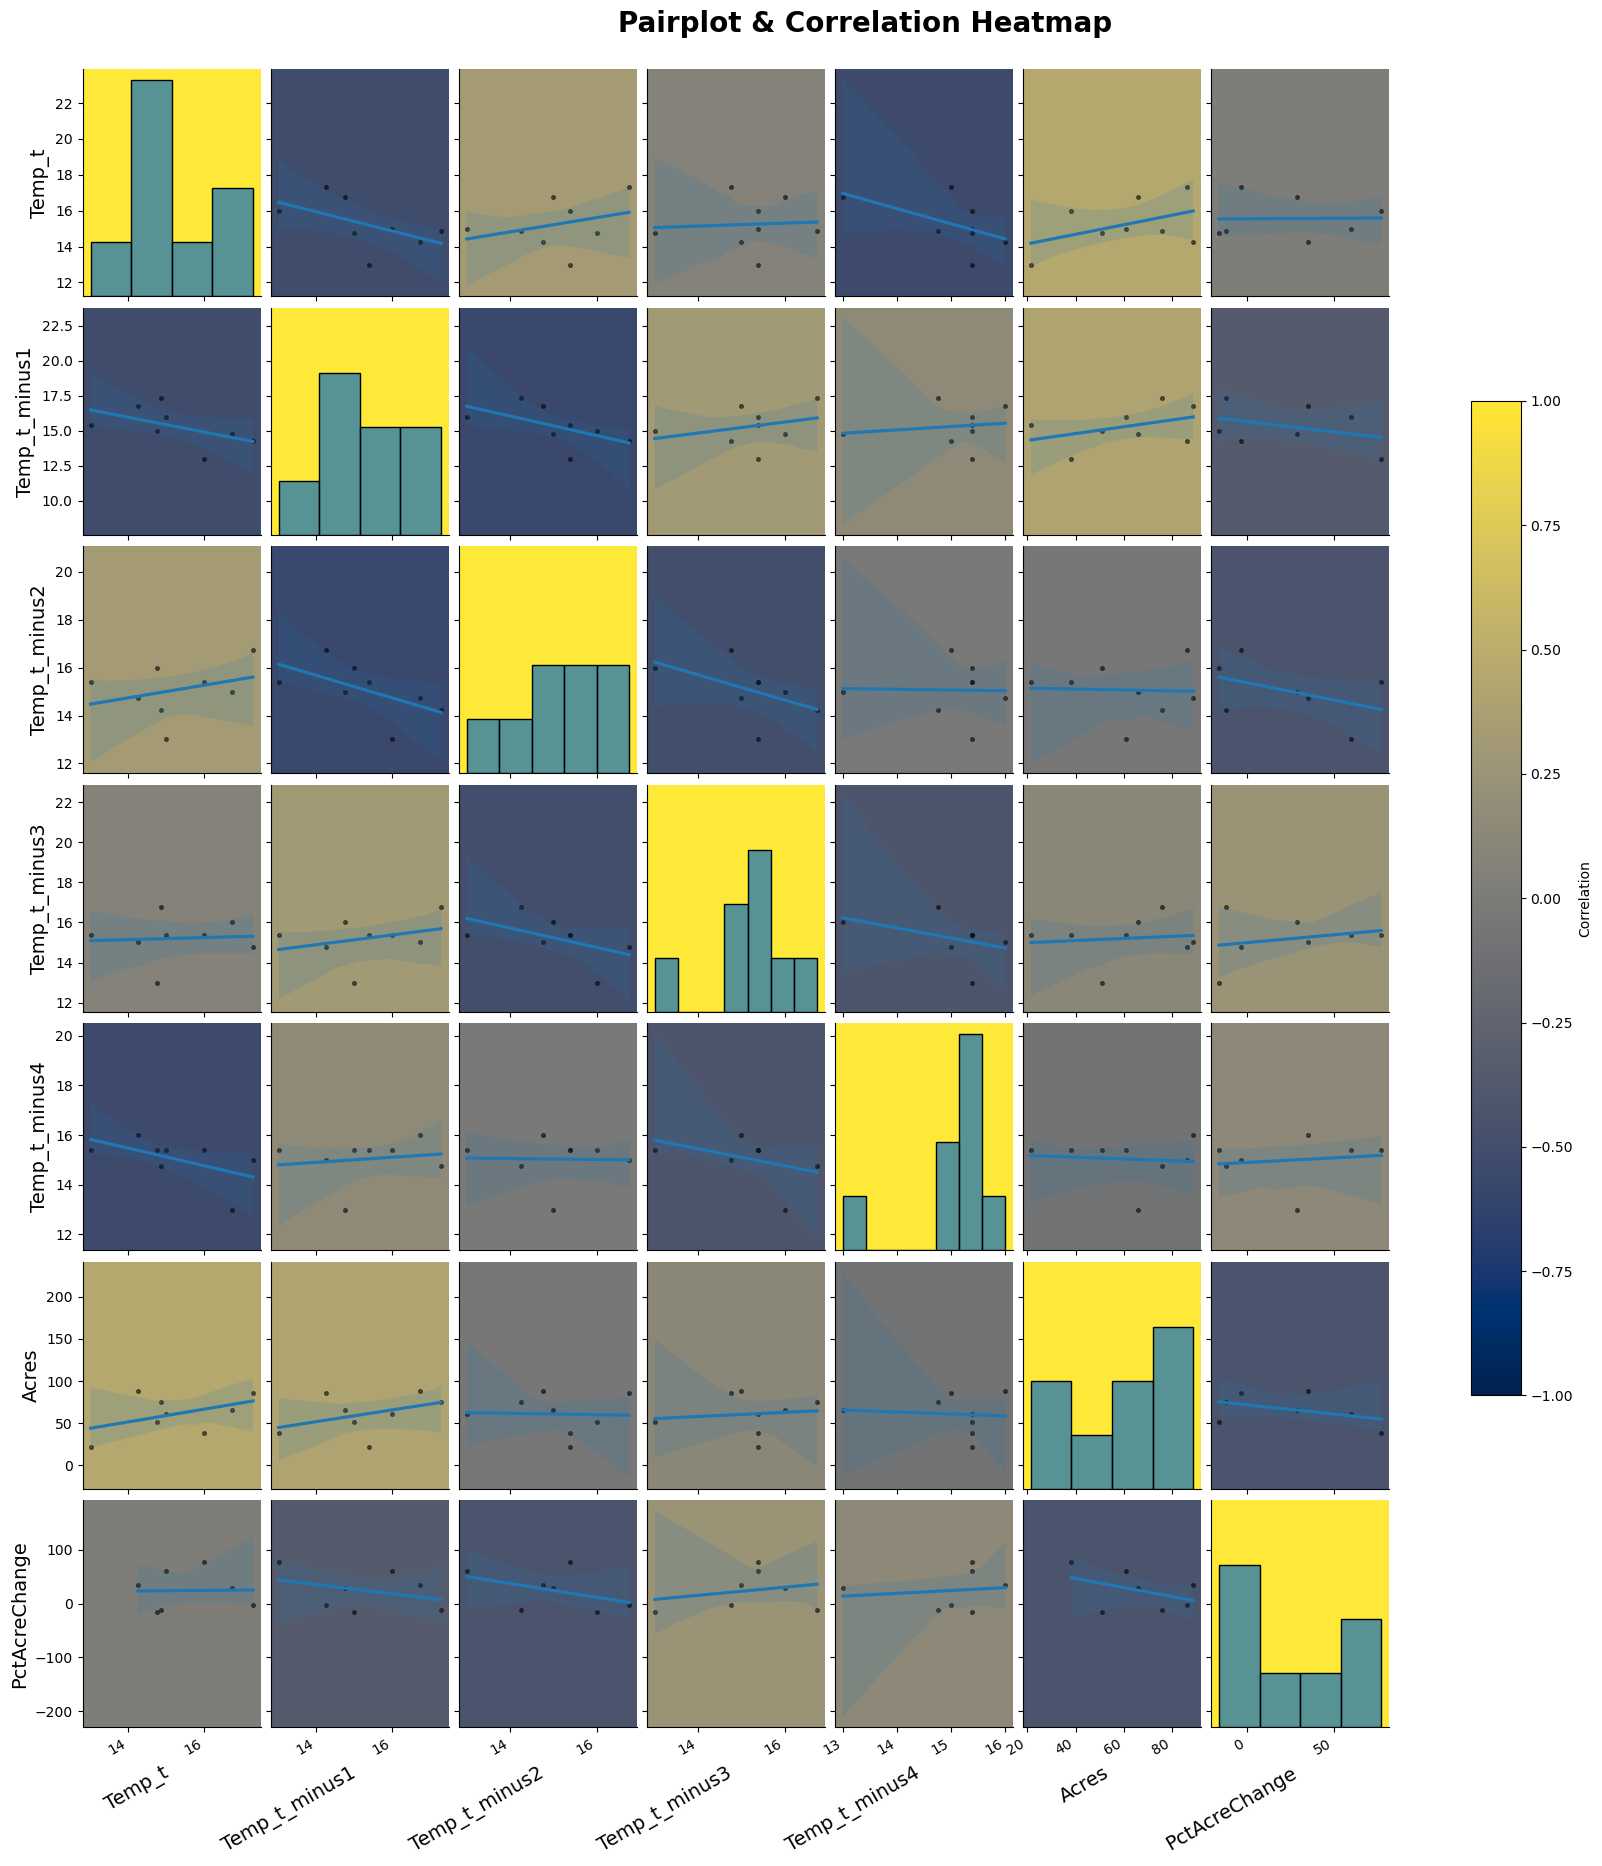

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0      POSS  2017-08-24        24.0           8.0       2017.0  21.484920   
1      POSS  2018-08-14        14.0           8.0       2018.0  38.002331   
2      POSS  2019-08-16        16.0           8.0       2019.0  60.670912   
3      POSS  2020-08-31        31.0           8.0       2020.0  51.085699   
4      POSS  2021-08-11        11.0           8.0       2021.0  65.733887   
5      POSS  2022-09-10        10.0           9.0       2022.0  88.630361   
6      POSS  2023-08-14        14.0           8.0       2023.0  85.887200   
7      POSS  2024-08-16        16.0           8.0       2024.0  75.564707   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  13.000      15.382143      15.382143      15.382143      15.382143   
1  16.000      13.000000      15.382143      15.382143      15.382143   
2  15.000      16.000000      13.000000      15.382143      15.382143   
3  14.750      15.000000      16.000000      13.000000      15.382143   
4  16.750      14.750000      15.000000      16.000000      13.000000   
5  14.250      16.750000      14.750000      15.000000      16.000000   
6  17.300      14.250000      16.750000      14.750000      15.000000   
7  14.875      17.300000      14.250000      16.750000      14.750000   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               13.0               <NA>               <NA>               <NA>   
2               16.0               13.0               <NA>               <NA>   
3               15.0               16.0               13.0               <NA>   
4              15.75               15.0               16.0               13.0   
5               16.5              15.75               15.0               16.0   
6              15.25               16.5              15.75               15.0   
7               15.8              15.25               16.5              15.75   

   PctAcreChange  
0            NaN  
1      76.879088  
2      59.650501  
3     -15.798696  
4      28.673755  
5      34.832071  
6      -3.095059  
7     -12.018662

In [258]:
fill_temperature(Possession_Point)
max_corr(Possession_Point)

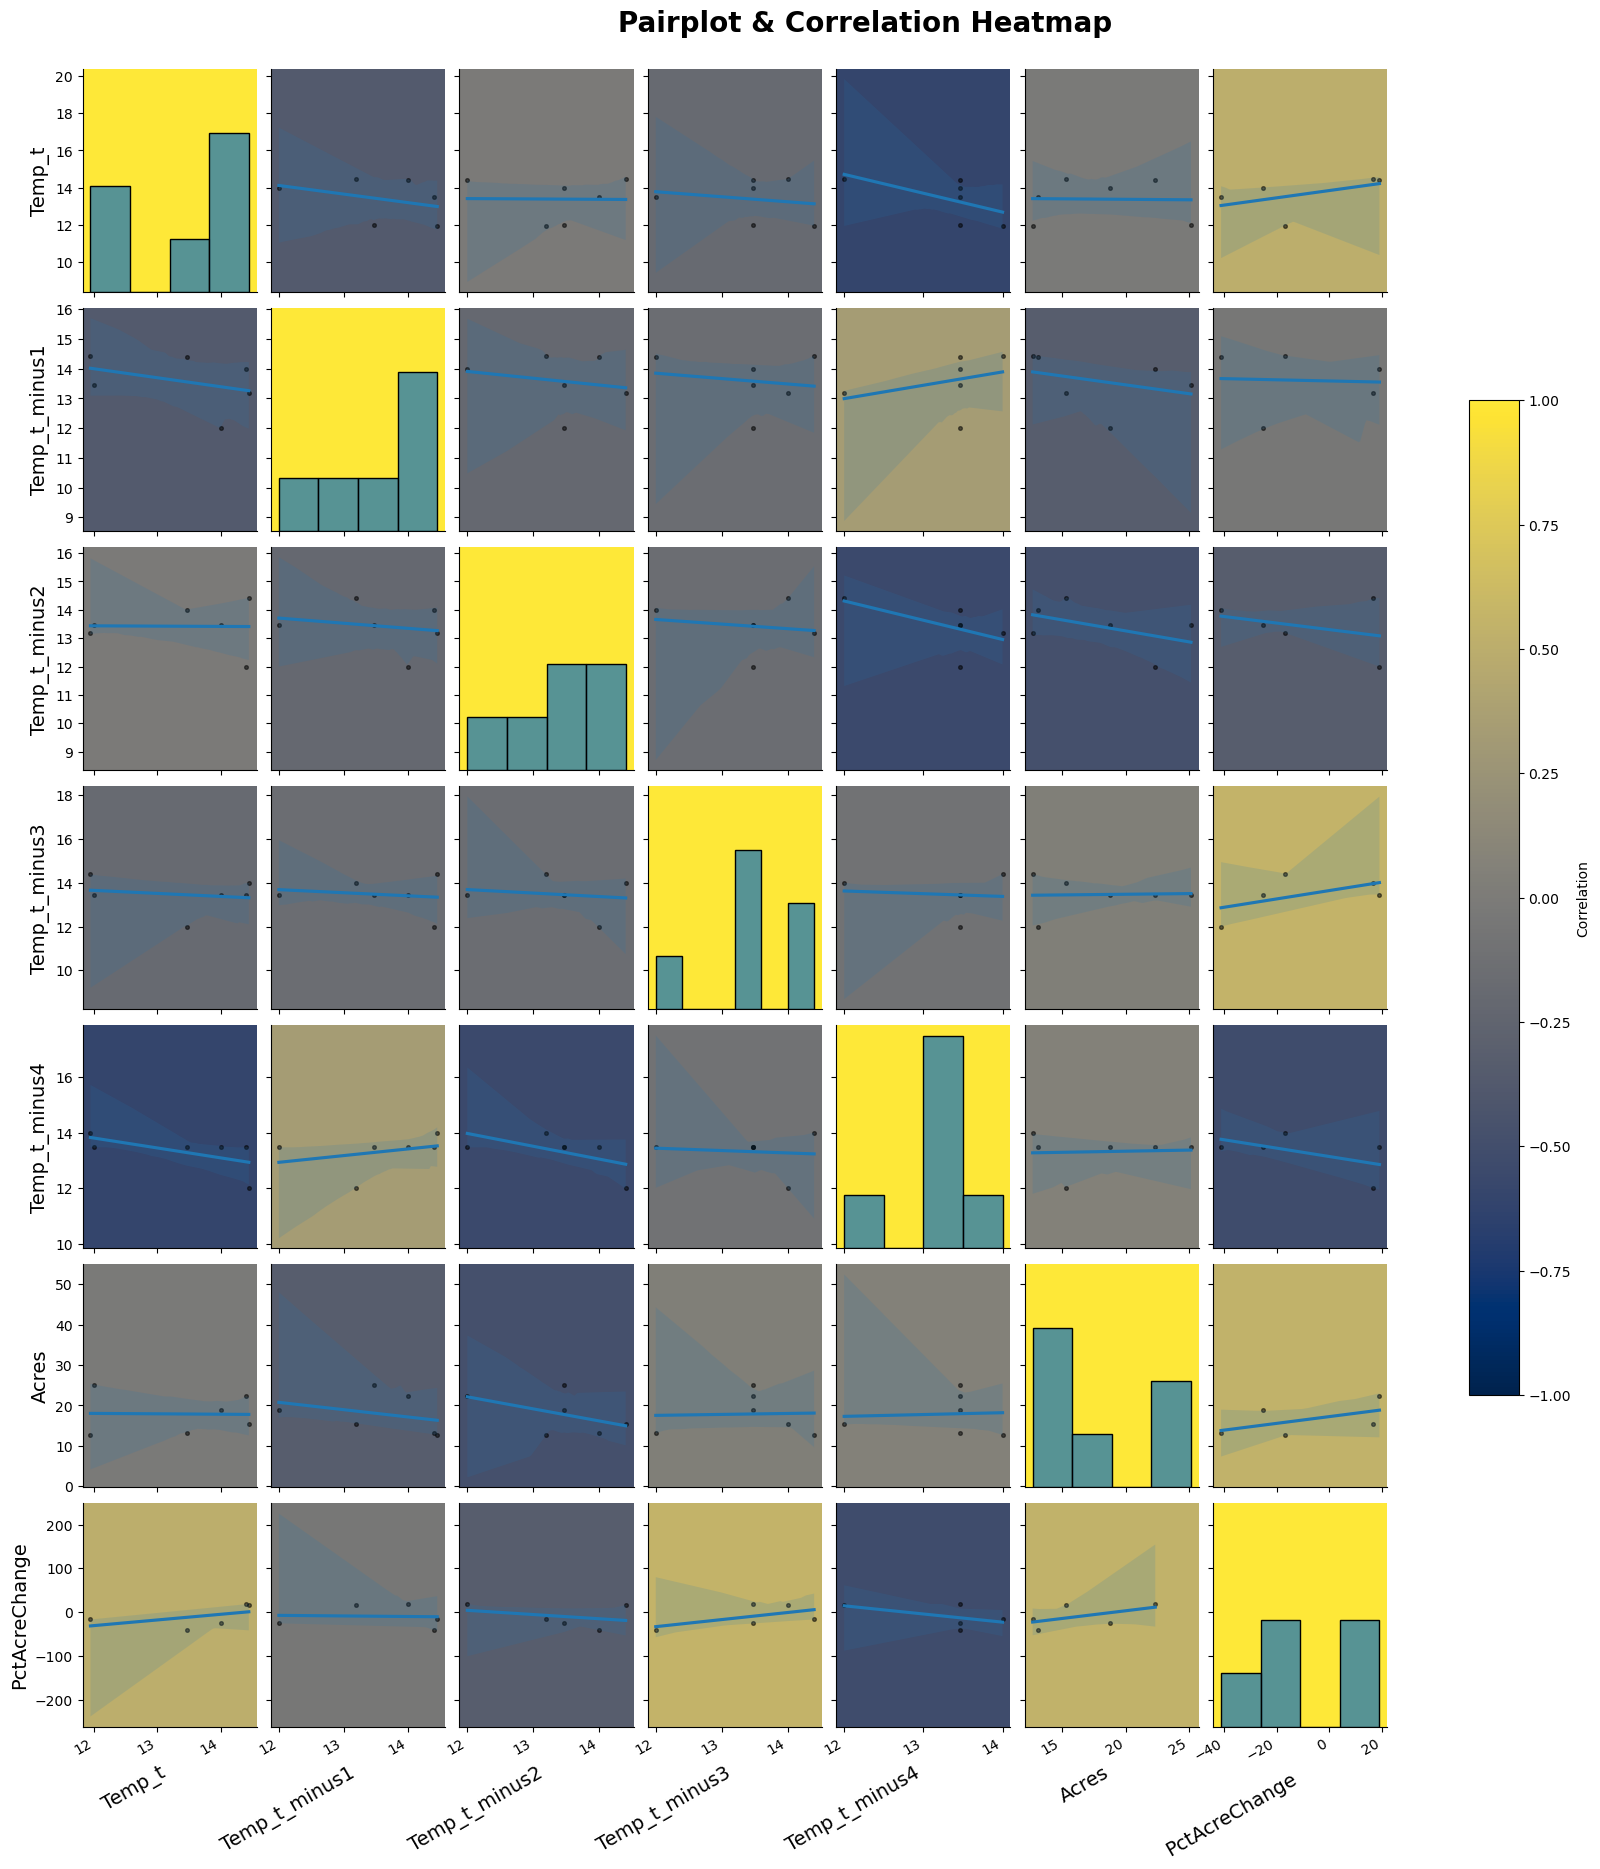

Site Code Survey Date  Survey Day  Survey Month  Survey Year      Acres  \
0      CLLB  2017-07-23        23.0           7.0       2017.0  25.128053   
1      CLLB  2018-07-16        16.0           7.0       2018.0  18.767499   
2      CLLB  2019-07-19        19.0           7.0       2019.0  22.331618   
3      CLLB  2020-07-23        23.0           7.0       2020.0  13.136316   
4      CLLB  2021-08-23        23.0           8.0       2021.0  15.315023   
5      CLLB  2022-08-29        29.0           8.0       2022.0  12.728182   

      Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  12.000000      13.466667      13.466667      13.466667      13.466667   
1  14.000000      12.000000      13.466667      13.466667      13.466667   
2  14.400000      14.000000      12.000000      13.466667      13.466667   
3  13.466667      14.400000      14.000000      12.000000      13.466667   
4  14.445000      13.195000      14.400000      14.000000      12.000000   
5  11.945000      14.445000      13.195000      14.400000      14.000000   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               13.0               <NA>               <NA>               <NA>   
2               14.0               13.0               <NA>               <NA>   
3               14.4               14.0               13.0               <NA>   
4                NaN               14.4               14.0               13.0   
5             14.445                NaN               14.4               14.0   

   PctAcreChange  
0            NaN  
1     -25.312563  
2      18.990913  
3     -41.176156  
4      16.585373  
5     -16.890872

In [261]:
fill_temperature(Clallam_Bay)
max_corr(Clallam_Bay)

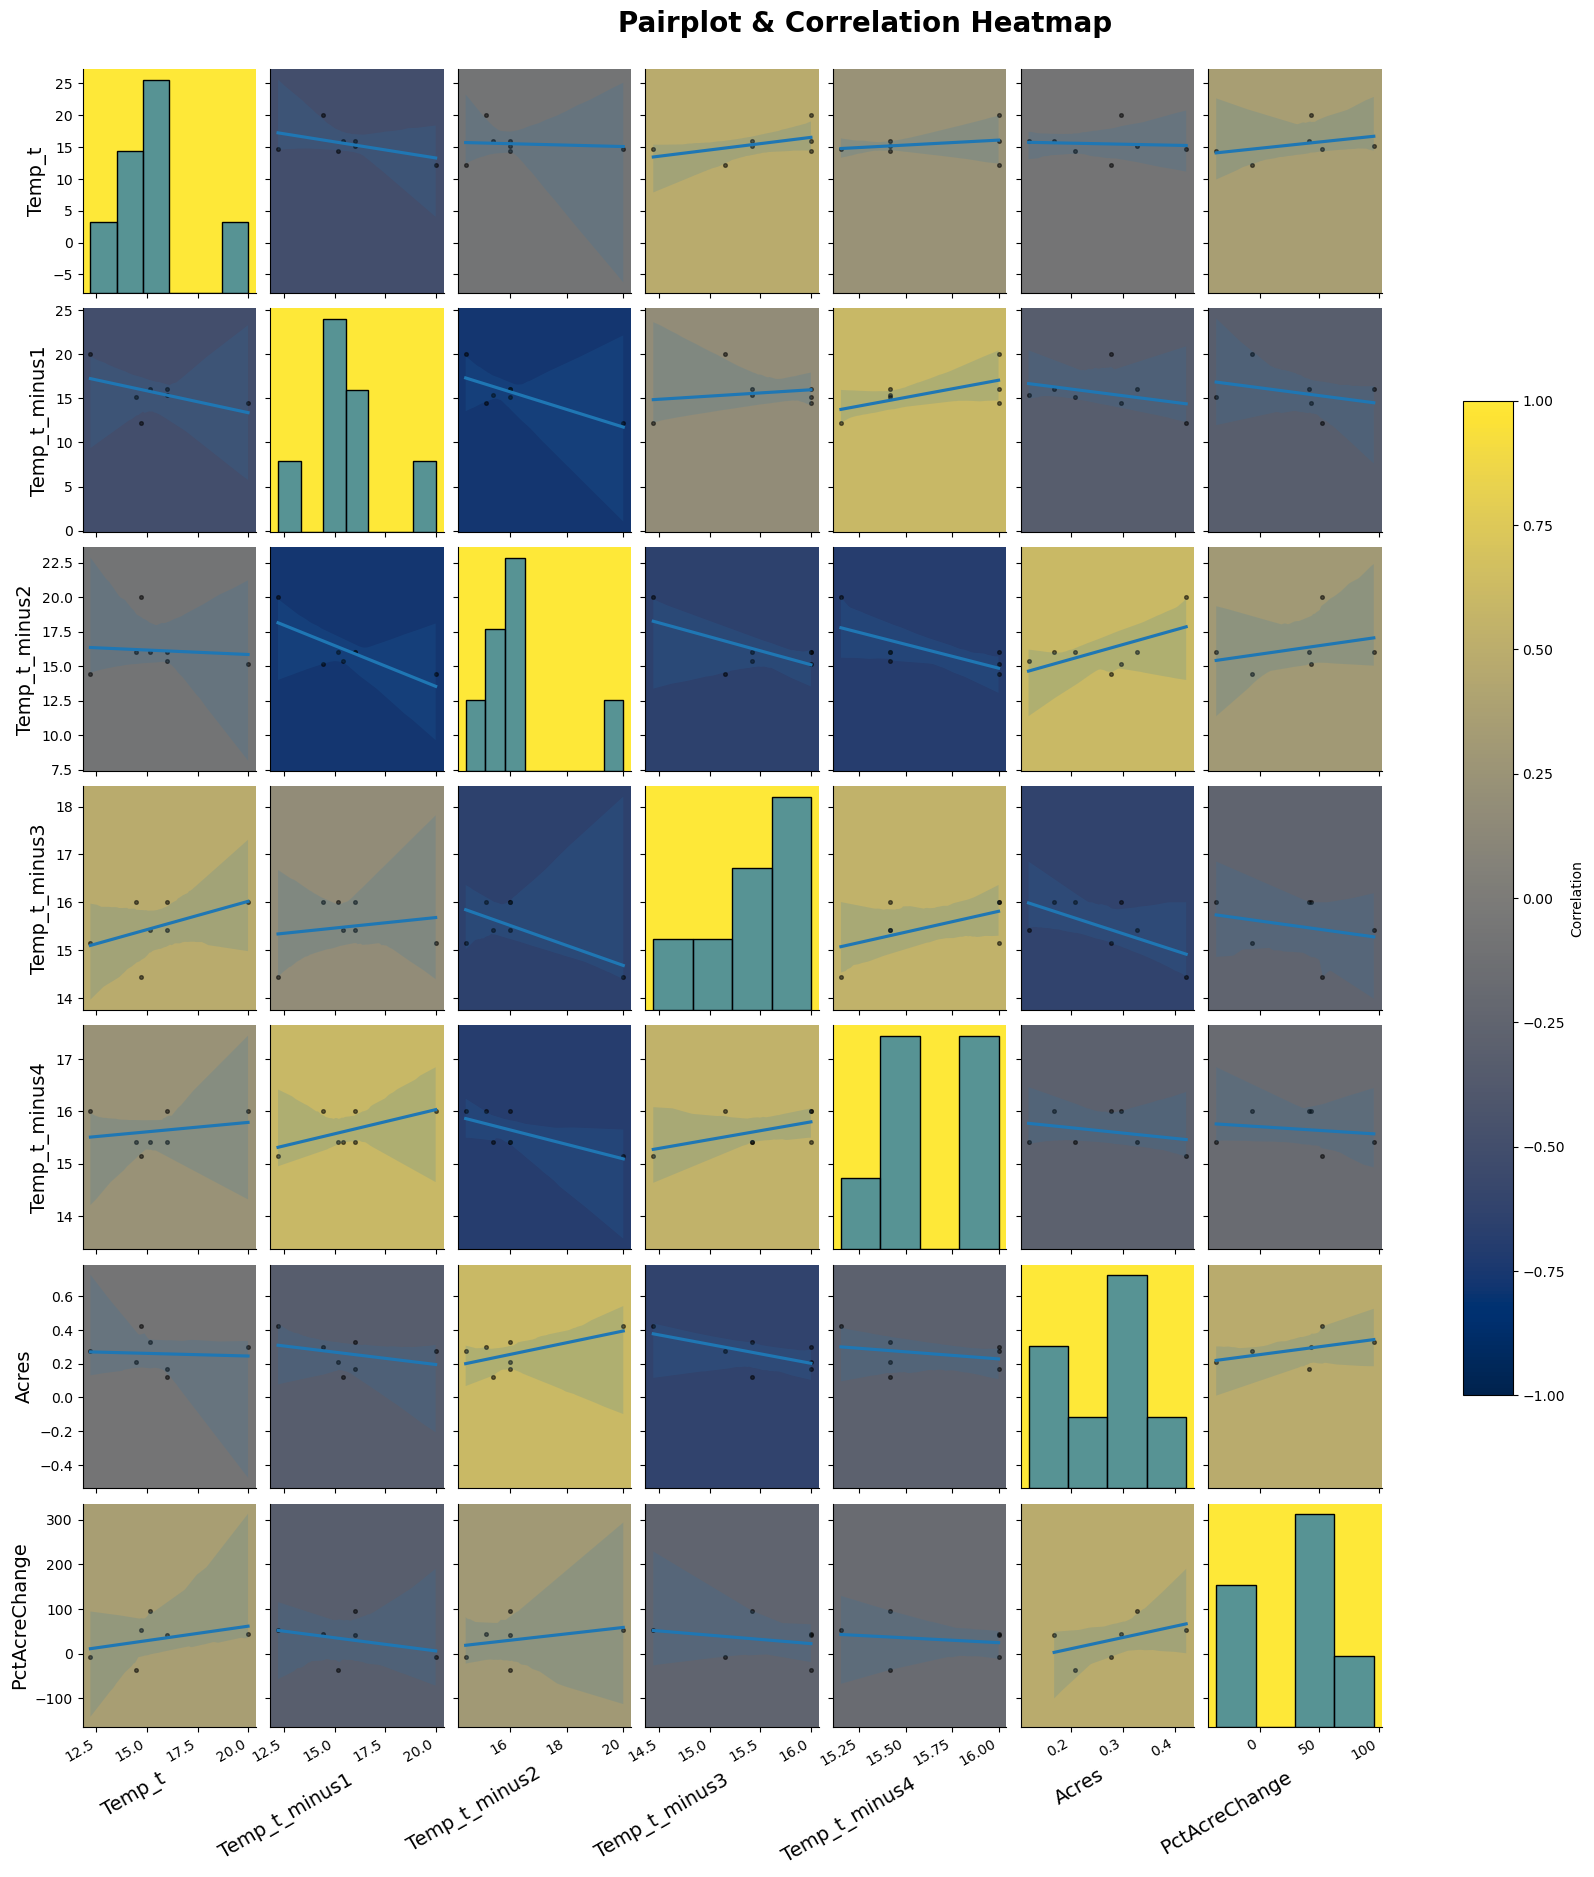

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0      AISP  2018-07-31        31.0           7.0       2018.0  0.117903   
1      AISP  2019-08-01         1.0           8.0       2019.0  0.167167   
2      AISP  2020-07-20        20.0           7.0       2020.0  0.327542   
3      AISP  2021-07-27        27.0           7.0       2021.0  0.207529   
4      AISP  2022-07-31        31.0           7.0       2022.0  0.296172   
5      AISP  2023-07-20        20.0           7.0       2023.0  0.275998   
6      AISP  2024-07-21        21.0           7.0       2024.0  0.421390   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0   16.00         15.415         15.415         15.415         15.415   
1   16.00         16.000         16.000         16.000         16.000   
2   15.15         16.000         16.000         15.415         15.415   
3   14.44         15.150         16.000         16.000         15.415   
4   20.00         14.440         15.150         16.000         16.000   
5   12.20         20.000         14.440         15.150         16.000   
6   14.70         12.200         20.000         14.440         15.150   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               16.0               <NA>               <NA>               <NA>   
2               16.0               16.0               <NA>               <NA>   
3              15.15               16.0               16.0               <NA>   
4              14.44              15.15               16.0               16.0   
5               20.0              14.44              15.15               16.0   
6               12.2               20.0              14.44              15.15   

   PctAcreChange  
0            NaN  
1      41.783878  
2      95.936898  
3     -36.640490  
4      42.713633  
5      -6.811415  
6      52.678338

In [262]:
fill_temperature(Aiston_Preserve)
max_corr(Aiston_Preserve)

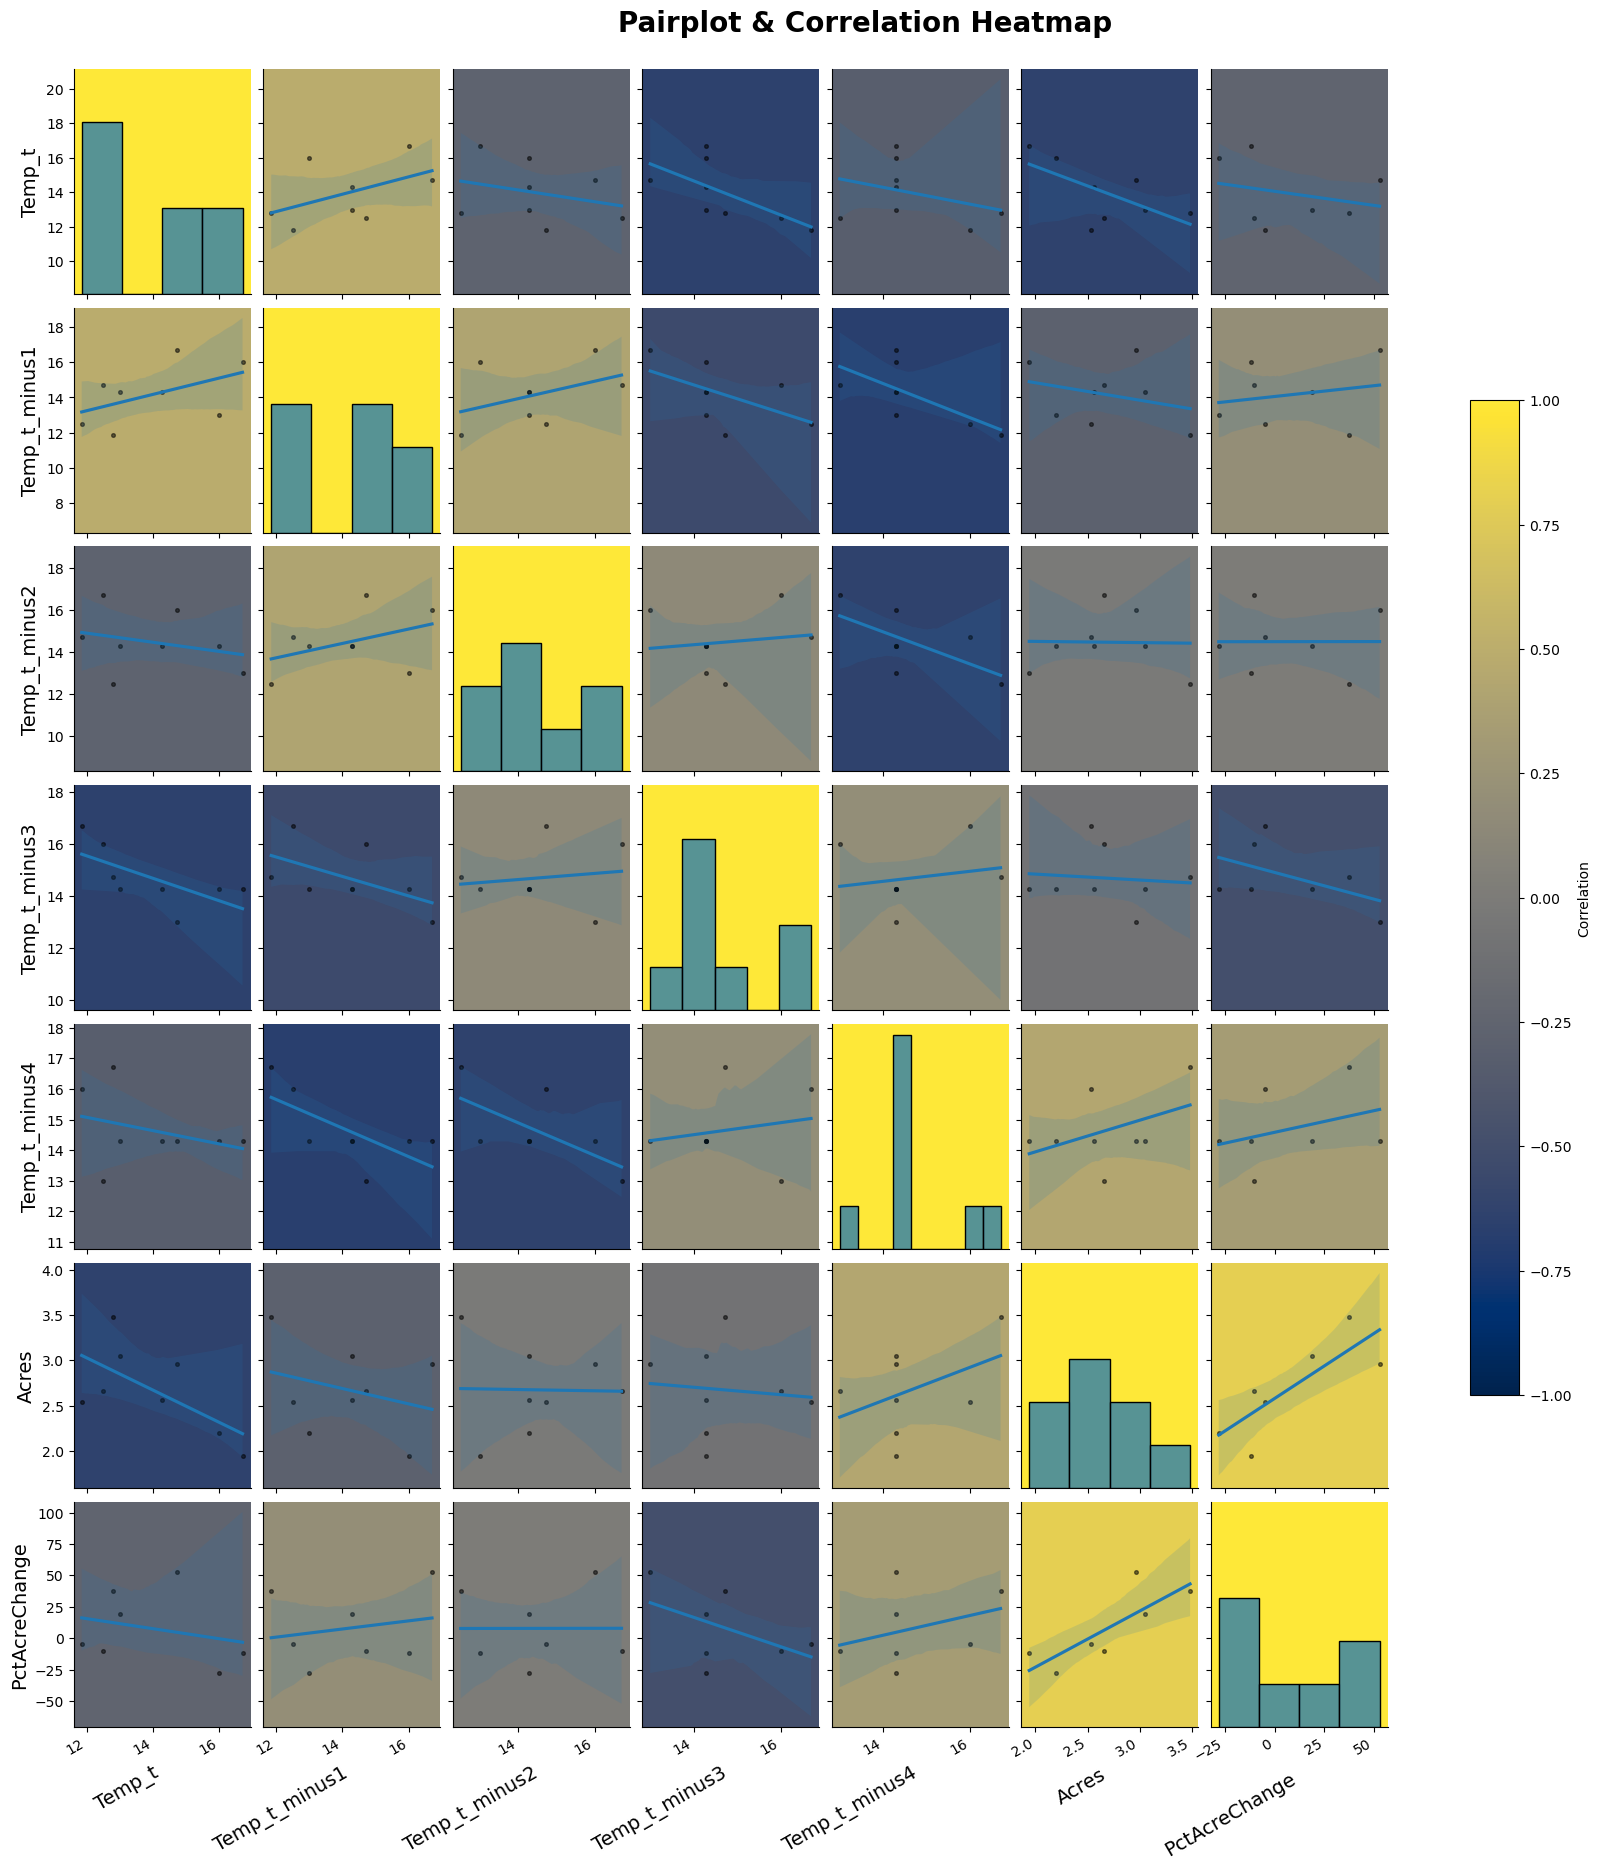

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0   LMMI-SW  2017-08-05         5.0           8.0       2017.0  2.562993   
1   LMMI-SW  2018-08-11        11.0           8.0       2018.0  3.050642   
2   LMMI-SW  2019-08-02         2.0           8.0       2019.0  2.198209   
3   LMMI-SW  2020-08-16        16.0           8.0       2020.0  1.941753   
4   LMMI-SW  2021-08-09         9.0           8.0       2021.0  2.964306   
5   LMMI-SW  2022-08-13        13.0           8.0       2022.0  2.660643   
6   LMMI-SW  2023-07-31        31.0           7.0       2023.0  2.536696   
7   LMMI-SW  2024-08-17        17.0           8.0       2024.0  3.480673   

      Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  14.286667      14.286667      14.286667      14.286667      14.286667   
1  13.000000      14.286667      14.286667      14.286667      14.286667   
2  16.000000      13.000000      14.286667      14.286667      14.286667   
3  16.700000      16.000000      13.000000      14.286667      14.286667   
4  14.720000      16.700000      16.000000      13.000000      14.286667   
5  12.500000      14.720000      16.700000      16.000000      13.000000   
6  11.850000      12.500000      14.720000      16.700000      16.000000   
7  12.800000      11.850000      12.500000      14.720000      16.700000   

   Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3  \
0               16.00               <NA>               <NA>   
1                 NaN               16.0               <NA>   
2               13.00                NaN               16.0   
3               16.00               13.0                NaN   
4               16.70               16.0               13.0   
5               14.72               16.7               16.0   
6               12.50              14.72               16.7   
7               11.85               12.5              14.72   

  Temp_offset_minus4  PctAcreChange  
0               <NA>            NaN  
1               <NA>      19.026531  
2               <NA>     -27.942732  
3               16.0     -11.666619  
4                NaN      52.661385  
5               13.0     -10.243982  
6               16.0      -4.658545  
7               16.7      37.212838

In [260]:
fill_temperature(Lummi_SW)
max_corr(Lummi_SW)

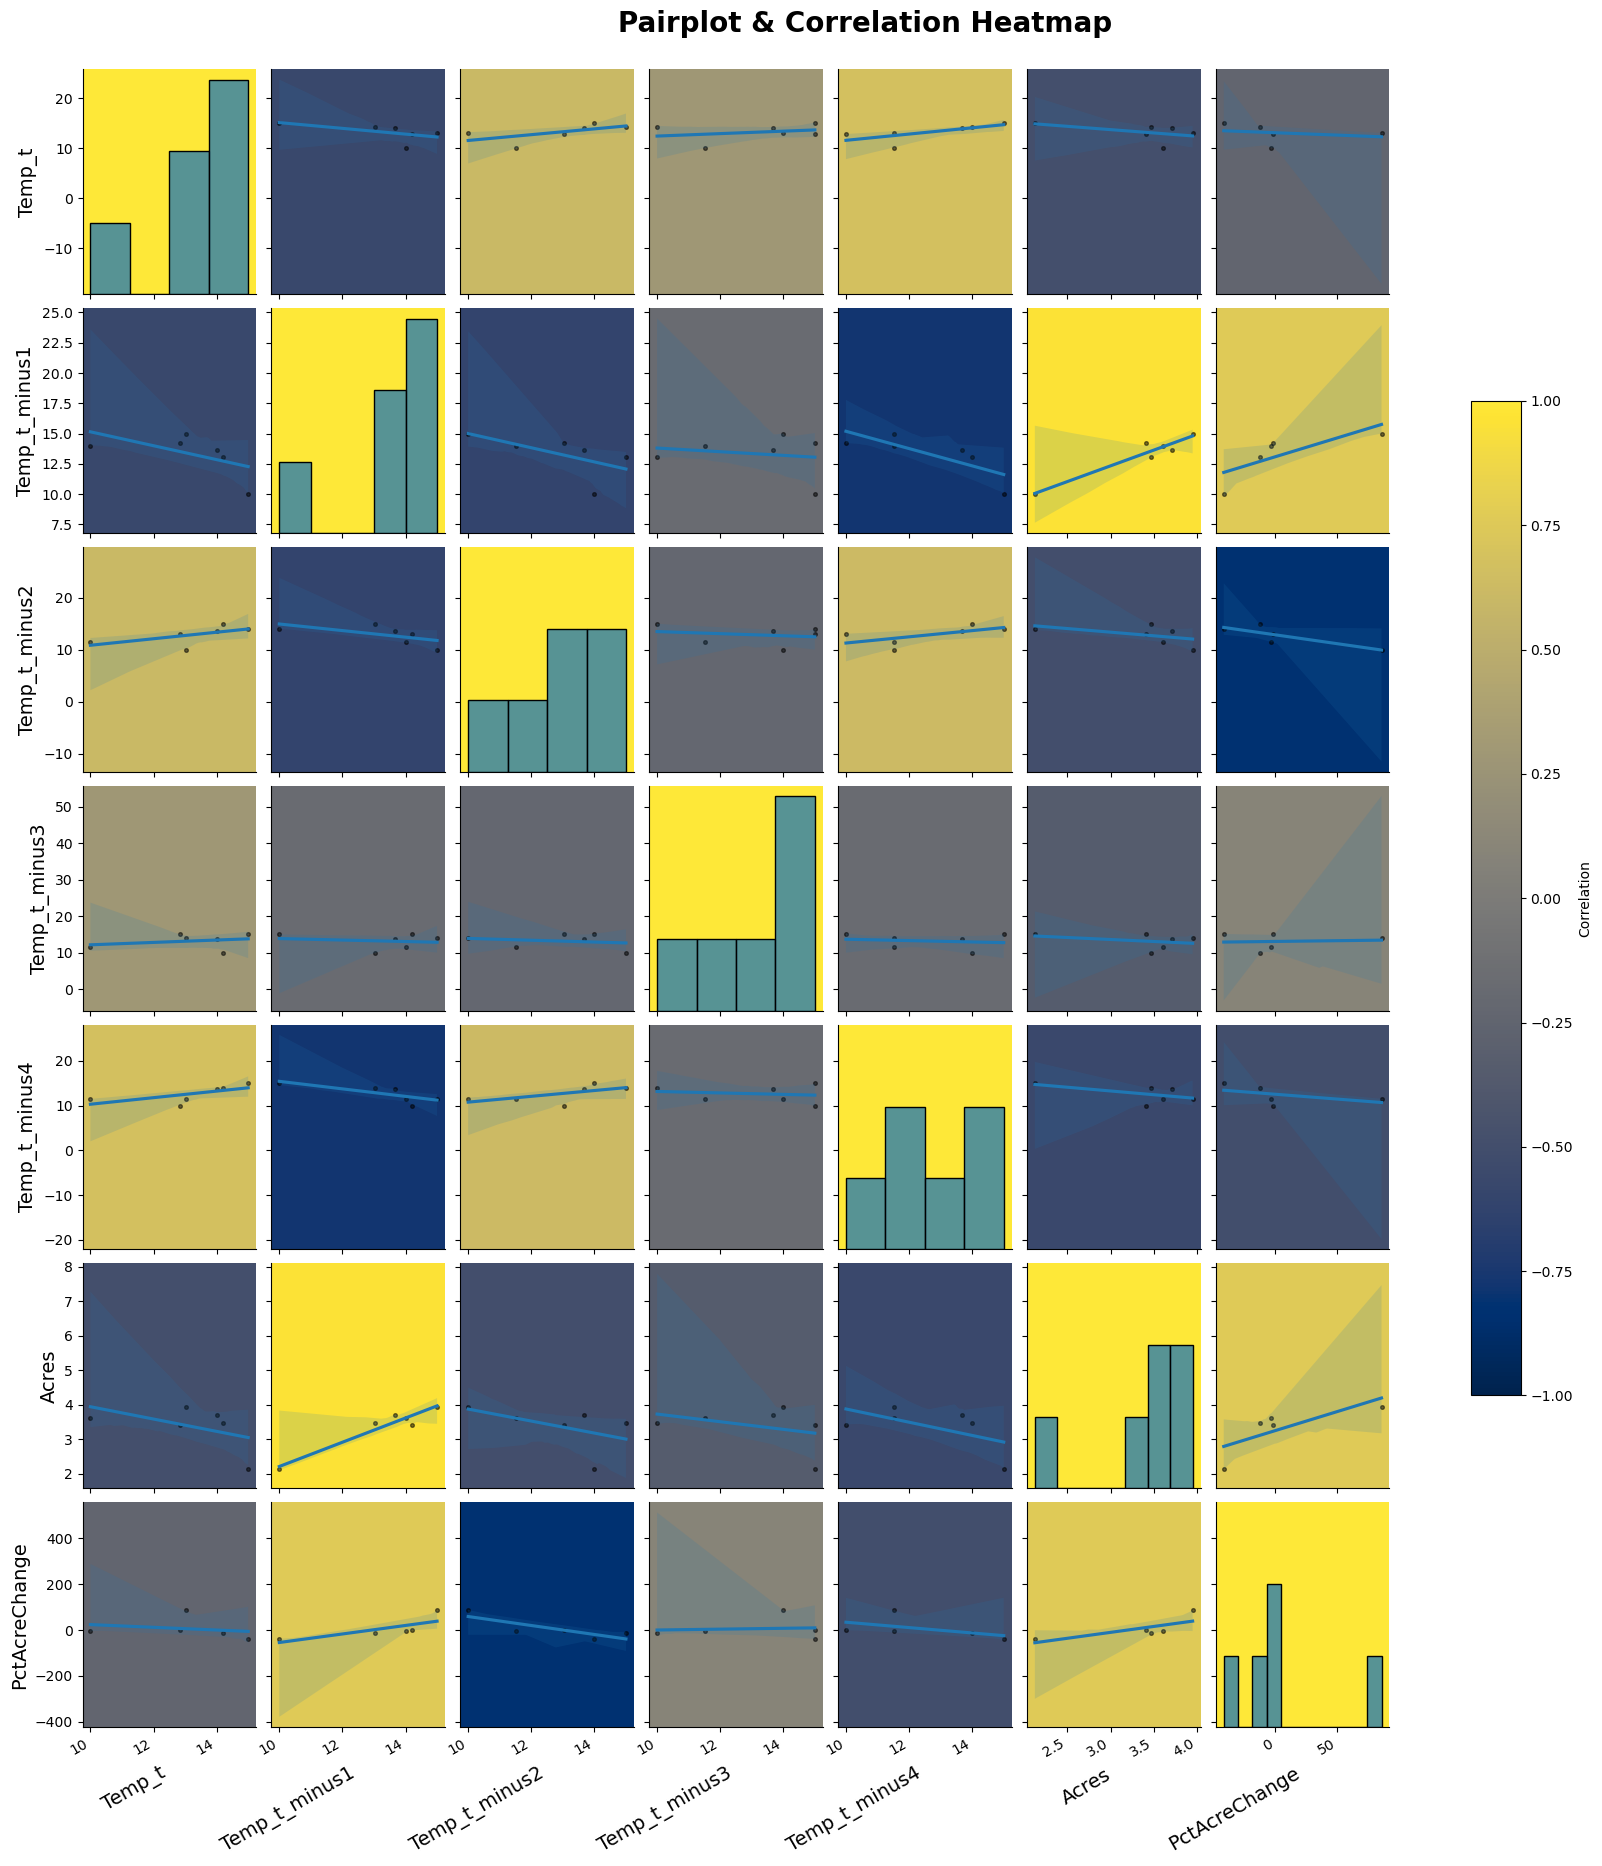

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0      HOYP  2016-08-19        19.0           8.0       2016.0  3.712156   
1      HOYP  2017-07-25        25.0           7.0       2017.0  3.605778   
2      HOYP  2021-09-06         6.0           9.0       2021.0  2.128078   
3      HOYP  2022-07-18        18.0           7.0       2022.0  3.944428   
4      HOYP  2023-08-15        15.0           8.0       2023.0  3.468347   
5      HOYP  2024-08-16        16.0           8.0       2024.0  3.406280   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0  14.000         13.675        13.6750        13.6750        13.6750   
1  10.000         14.000        11.5125        11.5125        11.5125   
2  15.000         10.000        14.0000        15.0000        15.0000   
3  13.025         15.000        10.0000        14.0000        11.5125   
4  14.200         13.025        15.0000        10.0000        14.0000   
5  12.825         14.200        13.0250        15.0000        10.0000   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               14.0               <NA>               <NA>               <NA>   
2               <NA>               <NA>                NaN                9.0   
3               11.0               <NA>               <NA>                NaN   
4             13.025               11.0               <NA>               <NA>   
5              13.55             13.025               11.0               <NA>   

   PctAcreChange  
0            NaN  
1      -2.865681  
2     -40.981437  
3      85.351647  
4     -12.069707  
5      -1.789522

In [257]:
fill_temperature(Hoypus_Point)
max_corr(Hoypus_Point)

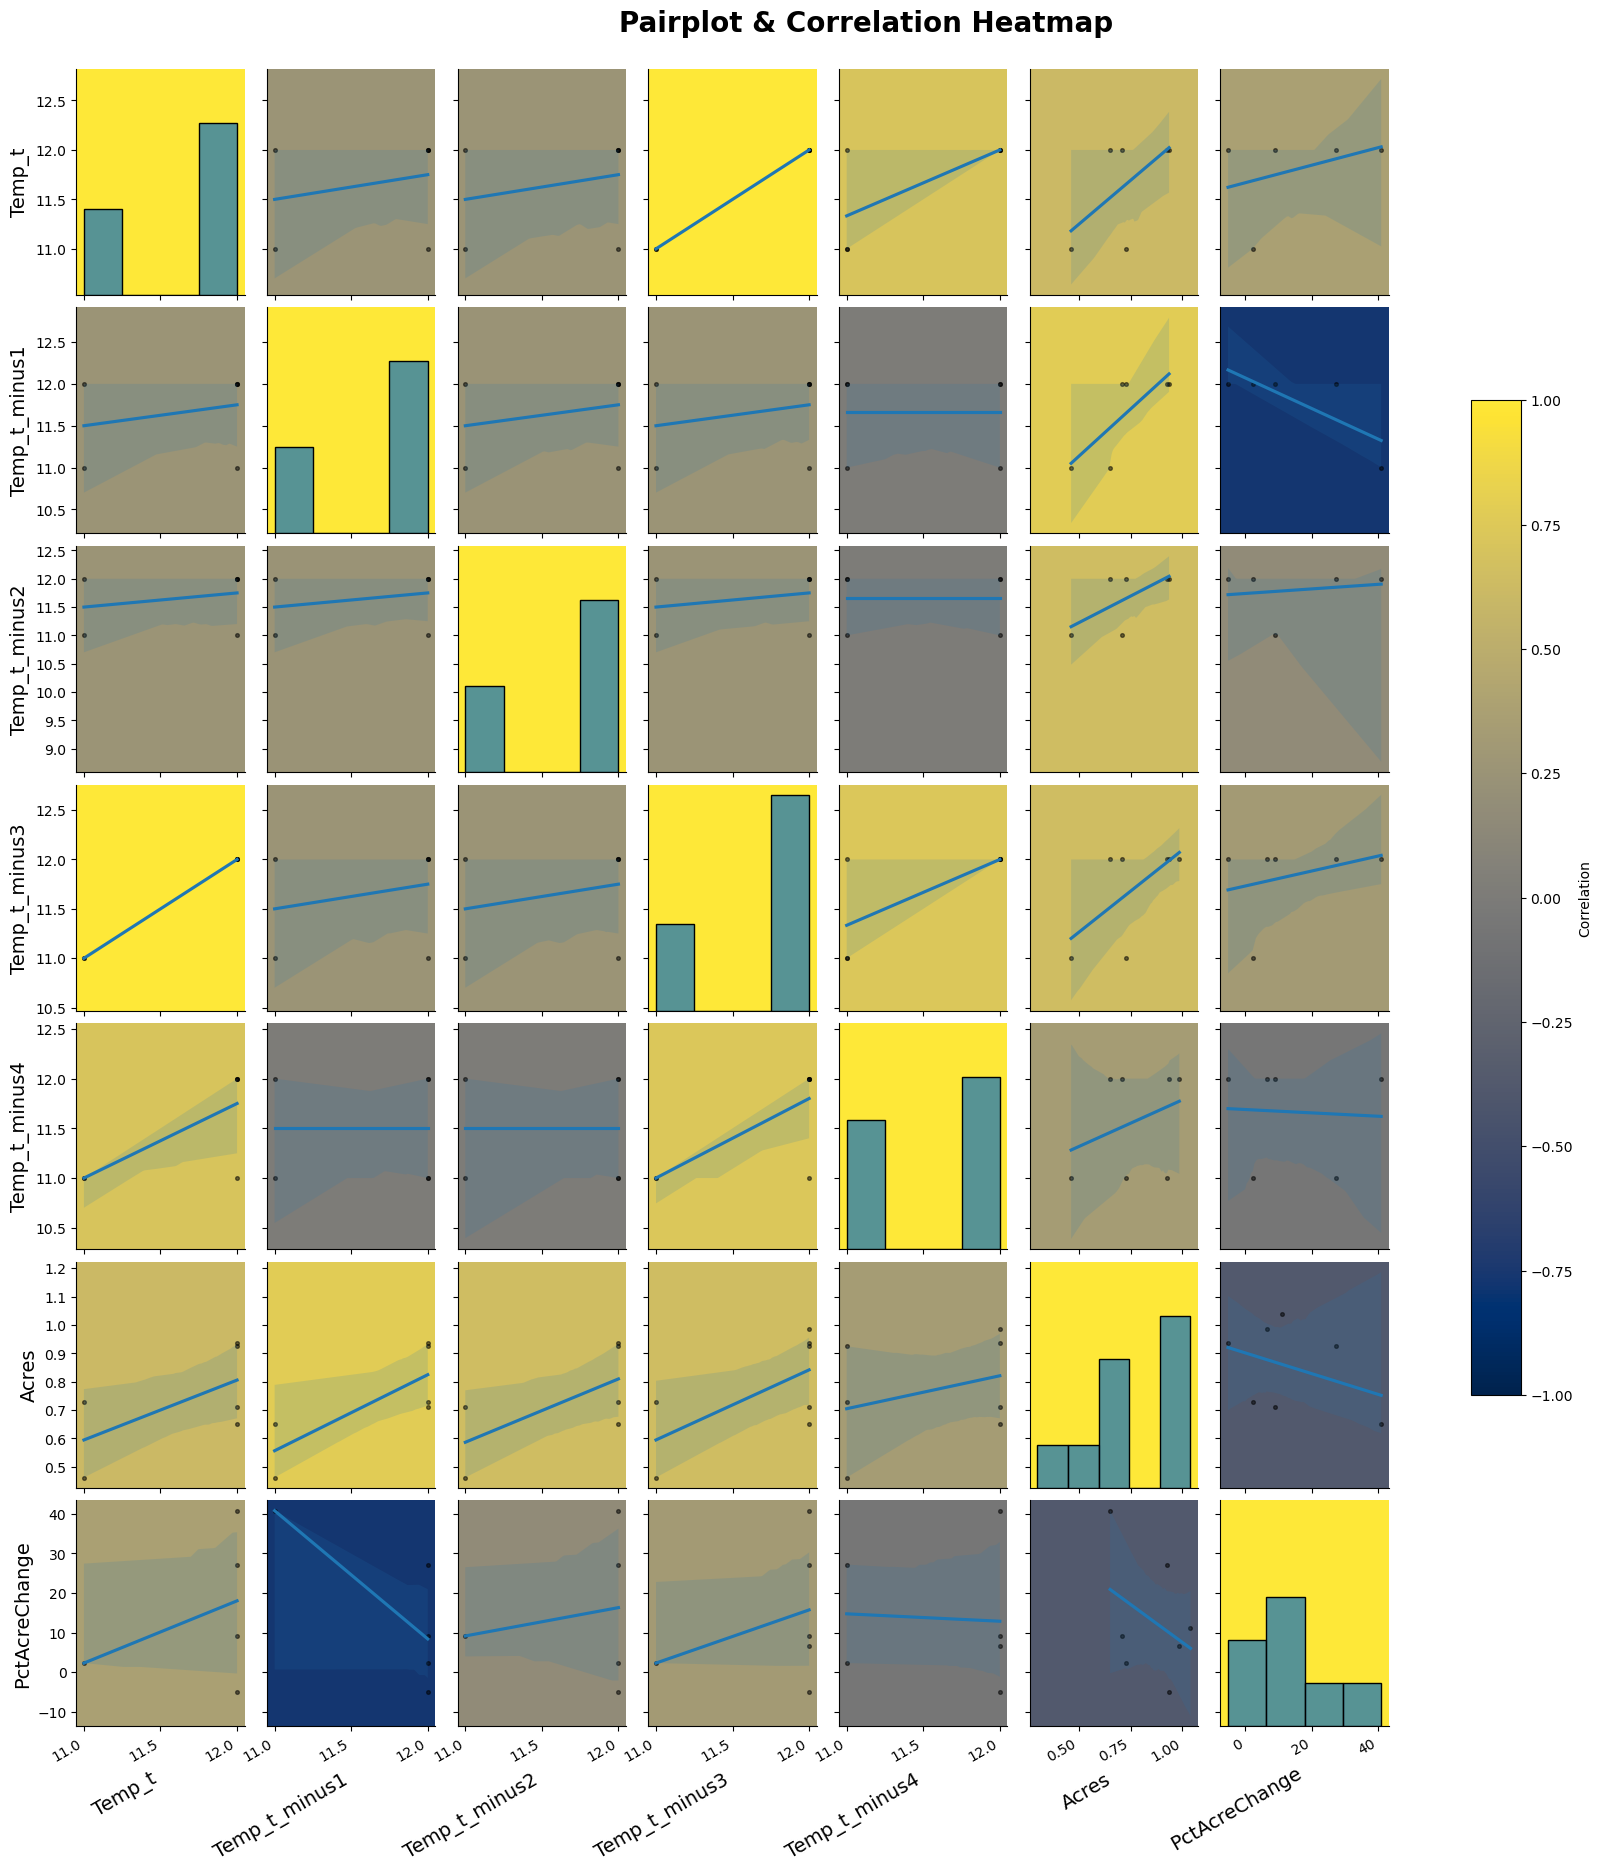

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0      BZPT  2017-07-25        25.0           7.0       2017.0  0.462356   
1      BZPT  2018-08-13        13.0           8.0       2018.0  0.651077   
2      BZPT  2019-08-26        26.0           8.0       2019.0  0.710716   
3      BZPT  2020-07-23        23.0           7.0       2020.0  0.727106   
4      BZPT  2021-08-20        20.0           8.0       2021.0  0.924858   
5      BZPT  2022-09-08         8.0           9.0       2022.0  0.985684   
6      BZPT  2023-08-13        13.0           8.0       2023.0  0.936030   
7      BZPT  2024-09-16        16.0           9.0       2024.0  1.039652   
8    BZPT-S  2023-08-13        13.0           8.0       2023.0  0.299155   

   Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0    11.0           11.0           11.0           11.0           11.0   
1    12.0           11.0           12.0           12.0           12.0   
2    12.0           12.0           11.0           12.0           12.0   
3    11.0           12.0           12.0           11.0           11.0   
4    12.0           12.0           12.0           12.0           11.0   
5     NaN            NaN            NaN           12.0           12.0   
6    12.0           12.0           12.0           12.0           12.0   
7     NaN            NaN            NaN            NaN            NaN   
8     NaN            NaN            NaN            NaN            NaN   

  Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3 Temp_offset_minus4  \
0               <NA>               <NA>               <NA>               <NA>   
1               11.0               <NA>               <NA>               <NA>   
2               14.0               11.0               <NA>               <NA>   
3               13.0               14.0               11.0               <NA>   
4                NaN               13.0               14.0               11.0   
5                NaN                NaN               13.0               14.0   
6                NaN                NaN                NaN               13.0   
7                NaN                NaN                NaN                NaN   
8               <NA>               <NA>               <NA>               <NA>   

   PctAcreChange  
0            NaN  
1      40.817315  
2       9.159973  
3       2.306209  
4      27.197103  
5       6.576829  
6      -5.037528  
7      11.070322  
8            NaN

In [259]:
fill_temperature(Biz_Point)
max_corr(Biz_Point)

In [215]:
fill_temperature(Aiston_Preserve)
max_corr(Aiston_Preserve)


'Aiston_Preserve','Biz_Point','Cherry_Point_Gulf_Rd','Clallam_Bay','Coffin_Rocks',
    'Ebeys_Landing','Freshwater_Bay_1','Freshwater_Bay_2','Hat_Island','Hoypus_Point',
    'Lowell','Lummi_SW','North_Beach_East','Polnell_Point','Possession_Point',
    'Shannon_Point_East','Shannon_Point_West'

IndentationError: unexpected indent (2815538136.py, line 6)

In [241]:
allbed = pd.read_csv("/Users/carterwebb/Desktop/kelps/data/cleaned_data/AllBeds_Clean.csv")

allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]] = \
allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]].apply(pd.to_numeric, errors="coerce")


allbed = allbed.sort_values(["Site Code", "Survey Year"])


allbed["PctAcreChange"] = (
    allbed.groupby("Site Code")["Acres"].pct_change() * 100
)

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_64068/2128595762.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  allbed.groupby("Site Code")["Acres"].pct_change() * 100


In [217]:
allbed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 329
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             330 non-null    object 
 1   Site Code            330 non-null    object 
 2   Survey Date          330 non-null    object 
 3   Survey Day           330 non-null    float64
 4   NWSC Max Ext         329 non-null    float64
 5   Survey Month         330 non-null    float64
 6   Survey Year          330 non-null    float64
 7   Acres                328 non-null    float64
 8   Temp                 126 non-null    float64
 9   Temp1 Shore Edge     157 non-null    float64
 10  Temp1 Water Edge     171 non-null    float64
 11  Temp2 Shore Edge     82 non-null     float64
 12  Temp2 Water Edge     92 non-null     float64
 13  Ave Temp Shore Edge  159 non-null    float64
 14  Ave Temp Water Edge  170 non-null    float64
 15  PctAcreChange        312 non-null    float64


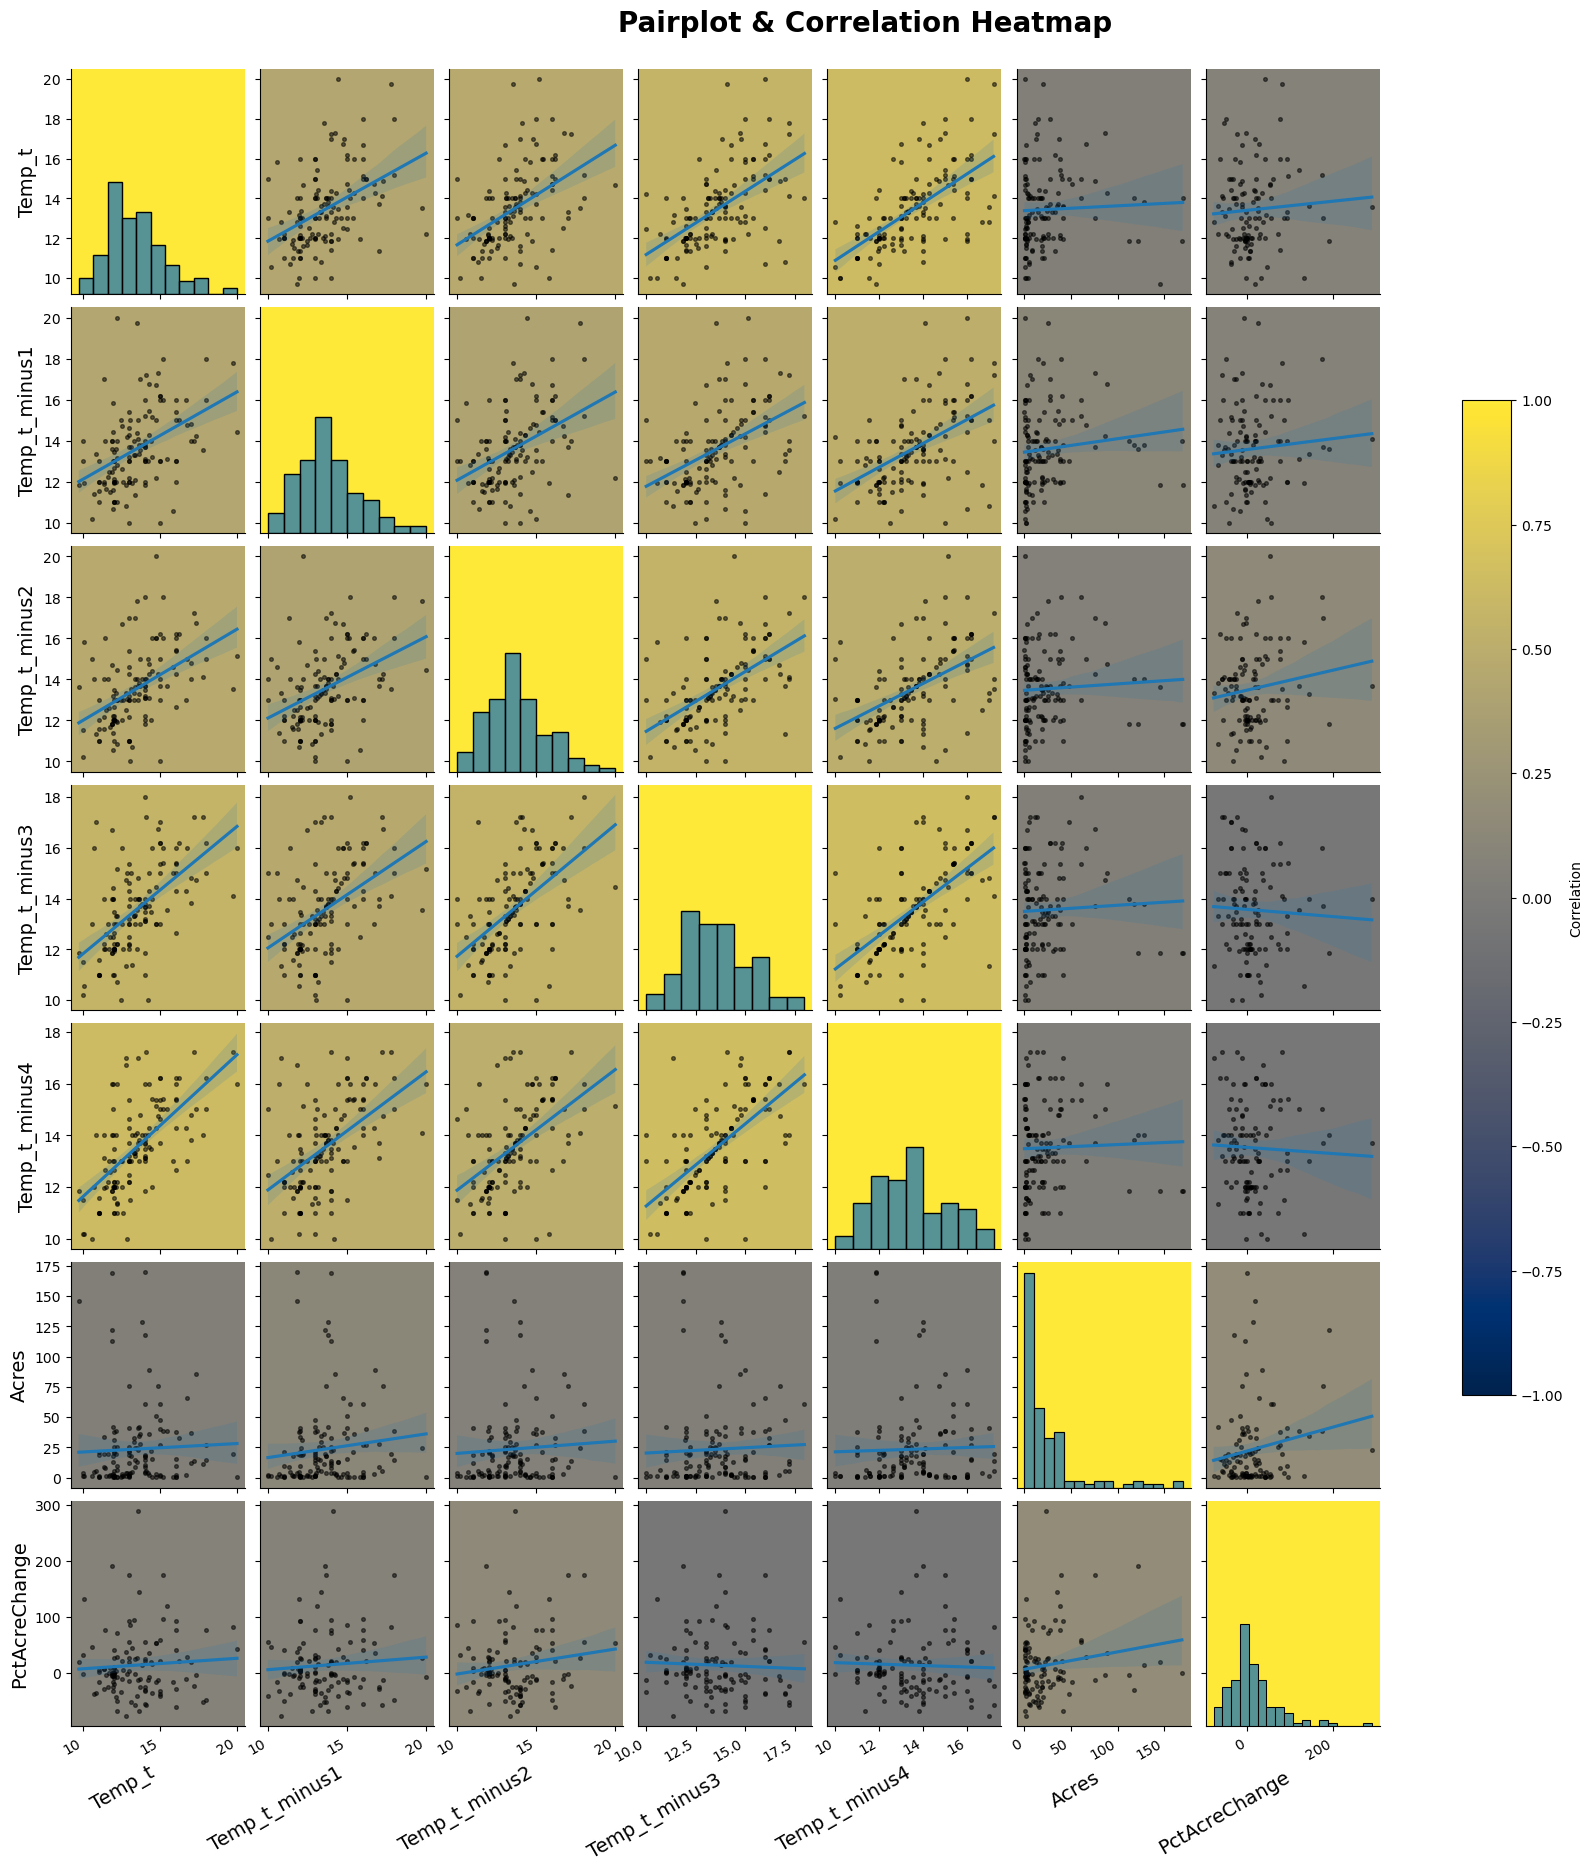

Site Code Survey Date  Survey Day  Survey Month  Survey Year     Acres  \
0        AISP  2018-07-31        31.0           7.0       2018.0  0.117903   
1        AISP  2019-08-01         1.0           8.0       2019.0  0.167167   
2        AISP  2020-07-20        20.0           7.0       2020.0  0.327542   
3        AISP  2021-07-27        27.0           7.0       2021.0  0.207529   
4        AISP  2022-07-31        31.0           7.0       2022.0  0.296172   
..        ...         ...         ...           ...          ...       ...   
132    SHPT-W  2020-09-18        18.0           9.0       2020.0  7.790410   
133    SHPT-W  2021-09-19        19.0           9.0       2021.0  4.860296   
134    SHPT-W  2022-08-12        12.0           8.0       2022.0  3.267264   
135    SHPT-W  2023-09-01         1.0           9.0       2023.0  4.720687   
136    SHPT-W  2024-08-16        16.0           8.0       2024.0  6.095017   

     Temp_t  Temp_t_minus1  Temp_t_minus2  Temp_t_minus3  Temp_t_minus4  \
0    16.000         15.415         15.415         15.415         15.415   
1    16.000         16.000         16.000         16.000         16.000   
2    15.150         16.000         16.000         15.415         15.415   
3    14.440         15.150         16.000         16.000         15.415   
4    20.000         14.440         15.150         16.000         16.000   
..      ...            ...            ...            ...            ...   
132  11.400         14.000         16.000         12.000         12.649   
133  10.695         11.400         14.000         16.000         12.000   
134  11.945         10.695         11.400         14.000         16.000   
135  13.150         11.945         10.695         11.400         14.000   
136  12.200         13.150         11.945         10.695         11.400   

    Temp_offset_minus1 Temp_offset_minus2 Temp_offset_minus3  \
0                 <NA>               <NA>               <NA>   
1                 16.0               <NA>               <NA>   
2                 16.0               16.0               <NA>   
3                15.15               16.0               16.0   
4                14.44              15.15               16.0   
..                 ...                ...                ...   
132               14.0                NaN               12.0   
133               14.4               14.0                NaN   
134             11.945               14.4               14.0   
135             11.665             11.945               14.4   
136              12.15             11.665             11.945   

    Temp_offset_minus4  PctAcreChange  
0                 <NA>            NaN  
1                 <NA>      41.783878  
2                 <NA>      95.936898  
3                 <NA>     -36.640490  
4                 16.0      42.713633  
..                 ...            ...  
132               <NA>      76.472068  
133               12.0     -37.611814  
134                NaN     -32.776441  
135               14.0      44.484413  
136               14.4      29.112919  

[137 rows x 16 columns]

In [250]:
fill_temperature(allbed)
max_corr(allbed)